<font color='blue'><h2>Data Analysis and Machine Learning Hackathon (Avaliação C3 (10,0 Pontos) – 2021/1)

---



# <font color='blue'>Informações gerais do Dataset

<table border="1" cellpadding="6">
    <tr>
		<td><p><b>Data Set Characteristics</b></p></td>
		<td><p>Multivariate</p></td>
		<td><p><b>Number of Instances:</b></p></td>
		<td><p>9000</p></td>
		<td><p><b>Area:</b></p></td>
		<td><p>Social</p></td>
	</tr>	
<tr>
		<td><p><b>Attribute Characteristics:</b></p></td>
		<td><p>Categorical, Integer</p></td>
		<td><p><b>Number of Attributes:</b></p></td>
		<td><p>86</p></td>
		<td><p><b>Date Donated</b></p></td>
		<td><p>2000-07-03</p></td>
	</tr>
	<tr>
		<td><p><b>Associated Tasks:</b></p></td>
		<td><p>Regression, Description</p></td>
		<td><p><b>Missing Values?</b></p></td>
		<td><p>No</p></td>
		<td><p><b>Number of Web Hits:</b></p></td>
		<td><p>170385</p></td>
	</tr>

**ticdata2000.txt ->** Conjunto de dados para treinar e validar modelos de previsão e construir uma descrição (5822 registros de clientes). Cada registro consiste em 86 atributos, contendo dados sociodemográficos (atributo 1-43) e propriedade do produto (atributos 44-86). Os dados sociodemográficos são derivados de CEP. Todos os clientes que vivem em áreas com o mesmo CEP têm os mesmos atributos sociodemográficos. Atributo 86, "CARAVAN:Número de políticas domésticas móveis", é a variável alvo.‎

**ticeval2000 ->** ‎Conjunto de dados para previsões (4000 registros de clientes). Tem o mesmo formato de TICDATA2000.txt, só que o alvo está faltando.‎‎ Os participantes devem retornar apenas a lista de alvos previstos. Todos os conjuntos de dados estão em formato delimitado por guias. O significado dos atributos e valores de atributos é dado abaixo.‎


**TICTGTS2000.txt ->** ‎Metas para o conjunto de avaliação.‎

#<font color='blue'> Dicionario das colunas

In [1]:
colunas = ['feature_'+str(i) for i in range(1,86)]
colunas.append('classe')

#<font color='blue'> Frameworks

In [2]:
import pandas as pd

#<font color='blue'>Análise inicial

<font color='green'><h2>Importando o dataset ticdata2000.txt

---



In [3]:
url = 'https://drive.google.com/file/d/1D_wN4Rh946kxRWLEE9wOlQzsg3VRheYc/view?usp=sharing'
url2= 'https://drive.google.com/uc?id=' + url.split('/')[-2]
dados = pd.read_csv(url2, sep='\t', names= colunas)
dados.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,...,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,classe
0,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,...,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,...,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,...,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [4]:
dados.shape

(5822, 86)

<font color='green'><h2>Verificando valores nulos no dataframe

---



In [5]:
# dados.info()
# Como são muitas colunas, não usarei o info() para verificação, evitando erros.

In [6]:
valores_nulos = dados.isnull().sum()
verificando_nulos = pd.DataFrame(valores_nulos, columns=['resultado'])
verificando_nulos.query('resultado > 0')

,resultado




**<font color='black'><h3>Conclusão:** Não há valores nulos no dataframe

---



## <font color='blue'>Realizando treino e teste com todas as features

---



**<h3>Separando as features da classe**




In [7]:
x = dados.drop(columns=['classe'])

In [8]:
y = dados['classe']

**<h3> Criando listas para extrair acuracias dos modelos**

In [9]:
registros_acuracia = []
registros_recall = []
registros_auc = []
registros_f1_micro = []
registros_f1_macro = []
registros_precision = []
index = []

<h3>Modelo de treino teste sem escala

In [10]:
def modelo_treino_teste(x , y, modelo_analisado, nome_modelo):
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import roc_curve
    from sklearn.metrics import auc
    from sklearn.metrics import f1_score
    from sklearn.metrics import precision_score


    SEED = 5
    np.random.seed(SEED)

    treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.3, stratify = y)
    print(f'Este modelo irá ter {len(treino_x)} de treino e {len(teste_x)} teste')

    modelo = modelo_analisado
    modelo.fit(treino_x, treino_y)
    previsoes = modelo.predict(teste_x)

    taxa_de_acuracia = accuracy_score(teste_y, previsoes) * 100
    taxa_de_recall = recall_score(teste_y, previsoes)
    fpr, tpr, thresholds = roc_curve(teste_y, previsoes)
    taxa_de_auc = auc(fpr, tpr)
    taxa_de_f1_micro = f1_score(teste_y, previsoes, average='micro')
    taxa_de_f1_macro = f1_score(teste_y, previsoes, average='macro')
    taxa_precision = precision_score(teste_y, previsoes)

    registros_acuracia.append(taxa_de_acuracia)
    registros_recall.append(taxa_de_recall)
    registros_auc.append(taxa_de_auc)
    registros_f1_micro.append(taxa_de_f1_micro)
    registros_f1_macro.append(taxa_de_f1_macro)
    registros_precision.append(taxa_precision)
    index.append(nome_modelo)

    print(f'A acuracia do modelo {nome_modelo} é de: {taxa_de_acuracia:.2f}%')
    print(f'A recall do modelo {nome_modelo} é de: {taxa_de_recall}')
    print(f'A auc do modelo {nome_modelo} é de: {taxa_de_auc}')
    print(f'A f1 micro do modelo {nome_modelo} é de: {taxa_de_f1_micro}')
    print(f'A f1 macro do modelo {nome_modelo} é de: {taxa_de_f1_macro}')
    print(f'A precision do modelo {nome_modelo} é de: {taxa_de_f1_macro}')

<h3>Modelo de treino teste com escala

In [11]:
def modelo_treino_teste_escalado(x , y, modelo_analisado, nome_modelo):
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from sklearn.preprocessing import StandardScaler  
    from sklearn.metrics import recall_score
    from sklearn.metrics import roc_curve
    from sklearn.metrics import auc
    from sklearn.metrics import f1_score
    from sklearn.metrics import precision_score 

    SEED = 5
    np.random.seed(SEED)

    raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.3, stratify = y)
    print(f'Este modelo irá ter {len(raw_treino_x)} de treino e {len(raw_teste_x)} teste')

    scale = StandardScaler()
    scale.fit(raw_treino_x)
    treino_x = scale.transform(raw_treino_x)
    teste_x =  scale.transform(raw_teste_x)

    modelo = SVC()
    modelo.fit(treino_x, treino_y)
    previsoes = modelo.predict(teste_x)

    taxa_de_acuracia = accuracy_score(teste_y, previsoes) * 100
    taxa_de_recall = recall_score(teste_y, previsoes)
    fpr, tpr, thresholds = roc_curve(teste_y, previsoes)
    taxa_de_auc = auc(fpr, tpr)
    taxa_de_f1_micro = f1_score(teste_y, previsoes, average='micro')
    taxa_de_f1_macro = f1_score(teste_y, previsoes, average='macro')
    taxa_precision = precision_score(teste_y, previsoes)

    registros_acuracia.append(taxa_de_acuracia)
    registros_recall.append(taxa_de_recall)
    registros_auc.append(taxa_de_auc)
    registros_f1_micro.append(taxa_de_f1_micro)
    registros_f1_macro.append(taxa_de_f1_macro)
    registros_precision.append(taxa_precision)
    index.append(nome_modelo)

    print(f'A acuracia do modelo {nome_modelo} é de: {taxa_de_acuracia:.2f}%')
    print(f'A recall do modelo {nome_modelo} é de: {taxa_de_recall}')
    print(f'A auc do modelo {nome_modelo} é de: {taxa_de_auc}')
    print(f'A f1 micro do modelo {nome_modelo} é de: {taxa_de_f1_micro}')
    print(f'A f1 macro do modelo {nome_modelo} é de: {taxa_de_f1_macro}')
    print(f'A precision do modelo {nome_modelo} é de: {taxa_de_f1_macro}')

In [12]:
from sklearn.dummy import DummyClassifier

modelo_dummy = DummyClassifier(strategy= 'most_frequent')
modelo_treino_teste(x , y,modelo_dummy, 'Baseline')

Este modelo irá ter 4075 de treino e 1747 teste
A acuracia do modelo Baseline é de: 94.05%
A recall do modelo Baseline é de: 0.0
A auc do modelo Baseline é de: 0.5
A f1 micro do modelo Baseline é de: 0.9404693760732683
A f1 macro do modelo Baseline é de: 0.48466076696165195
A precision do modelo Baseline é de: 0.48466076696165195


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
from sklearn.svm import LinearSVC

modelo_linearsvc = LinearSVC()
modelo_treino_teste(x , y,modelo_linearsvc, 'Linear_SVC')

Este modelo irá ter 4075 de treino e 1747 teste
A acuracia do modelo Linear_SVC é de: 94.05%
A recall do modelo Linear_SVC é de: 0.0
A auc do modelo Linear_SVC é de: 0.5
A f1 micro do modelo Linear_SVC é de: 0.9404693760732683
A f1 macro do modelo Linear_SVC é de: 0.48466076696165195
A precision do modelo Linear_SVC é de: 0.48466076696165195


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
from sklearn.svm import SVC

modelo_svc = SVC()
modelo_treino_teste_escalado(x , y,modelo_svc,'SVC')

Este modelo irá ter 4075 de treino e 1747 teste
A acuracia do modelo SVC é de: 93.99%
A recall do modelo SVC é de: 0.0
A auc do modelo SVC é de: 0.4996956786366403
A f1 micro do modelo SVC é de: 0.9398969662278193
A f1 macro do modelo SVC é de: 0.48450870463263496
A precision do modelo SVC é de: 0.48450870463263496


In [15]:
from sklearn.ensemble import GradientBoostingClassifier

modelo_xgboost = GradientBoostingClassifier(n_estimators=100)
modelo_treino_teste(x , y,modelo_xgboost, 'XGBoost')

Este modelo irá ter 4075 de treino e 1747 teste
A acuracia do modelo XGBoost é de: 93.93%
A recall do modelo XGBoost é de: 0.019230769230769232
A auc do modelo XGBoost é de: 0.5083980991619457
A f1 micro do modelo XGBoost é de: 0.9393245563823698
A f1 macro do modelo XGBoost é de: 0.5025198796475392
A precision do modelo XGBoost é de: 0.5025198796475392


In [16]:
from sklearn.ensemble import RandomForestClassifier

modelo_randomforest = RandomForestClassifier(n_estimators=100)
modelo_treino_teste(x , y,modelo_randomforest, 'Random_Forest')

Este modelo irá ter 4075 de treino e 1747 teste
A acuracia do modelo Random_Forest é de: 93.13%
A recall do modelo Random_Forest é de: 0.028846153846153848
A auc do modelo Random_Forest é de: 0.5086409710192424
A f1 micro do modelo Random_Forest é de: 0.931310818546079
A f1 macro do modelo Random_Forest é de: 0.5059947969686687
A precision do modelo Random_Forest é de: 0.5059947969686687


In [17]:
from sklearn.tree import DecisionTreeClassifier

modelo_decisiontree = DecisionTreeClassifier(max_depth = 3)
modelo_treino_teste(x , y,modelo_decisiontree, 'Decision_Tree')

Este modelo irá ter 4075 de treino e 1747 teste
A acuracia do modelo Decision_Tree é de: 93.93%
A recall do modelo Decision_Tree é de: 0.009615384615384616
A auc do modelo Decision_Tree é de: 0.5038947282176132
A f1 micro do modelo Decision_Tree é de: 0.9393245563823698
A f1 macro do modelo Decision_Tree é de: 0.49360657172234257
A precision do modelo Decision_Tree é de: 0.49360657172234257


In [18]:
from sklearn.naive_bayes import MultinomialNB

modelo_naivebayes = MultinomialNB()
modelo_treino_teste(x , y,modelo_naivebayes, 'Naive_Bayes')

Este modelo irá ter 4075 de treino e 1747 teste
A acuracia do modelo Naive_Bayes é de: 77.62%
A recall do modelo Naive_Bayes é de: 0.49038461538461536
A auc do modelo Naive_Bayes é de: 0.6423316868767265
A f1 micro do modelo Naive_Bayes é de: 0.7761877504293074
A f1 macro do modelo Naive_Bayes é de: 0.5383033241792966
A precision do modelo Naive_Bayes é de: 0.5383033241792966


In [19]:
from sklearn.ensemble import AdaBoostClassifier


modelo_adaboost = AdaBoostClassifier()
modelo_treino_teste(x , y,modelo_adaboost, 'Ada_Boost')


Este modelo irá ter 4075 de treino e 1747 teste
A acuracia do modelo Ada_Boost é de: 93.42%
A recall do modelo Ada_Boost é de: 0.028846153846153848
A auc do modelo Ada_Boost é de: 0.5101625778360409
A f1 micro do modelo Ada_Boost é de: 0.9341728677733258
A f1 macro do modelo Ada_Boost é de: 0.5077462493843918
A precision do modelo Ada_Boost é de: 0.5077462493843918


In [20]:
resultado_a = pd.DataFrame(registros_acuracia,
                          index=index, 
                          columns=['Acuracia_1'])
resultado_b = pd.DataFrame(registros_recall,
                          index=index, 
                          columns=['recall1'])
resultado_c = pd.DataFrame(registros_auc,
                          index=index, 
                          columns=['auc1'])
resultado_d = pd.DataFrame(registros_f1_micro,
                          index=index, 
                          columns=['f1_micro1'])
resultado_e = pd.DataFrame(registros_f1_macro,
                          index=index, 
                          columns=['f1_macro1'])
resultado_f = pd.DataFrame(registros_precision,
                          index=index, 
                          columns=['precision'])
resultado1 = pd.concat([resultado_a, resultado_b, resultado_c, resultado_d, resultado_e, resultado_f], axis = 'columns')
resultado1

,Acuracia_1,recall1,auc1,f1_micro1,f1_macro1,precision
Baseline,94.046938,0.000000,0.500000,0.940469,0.484661,0.000000
Linear_SVC,94.046938,0.000000,0.500000,0.940469,0.484661,0.000000
SVC,93.989697,0.000000,0.499696,0.939897,0.484509,0.000000
XGBoost,93.932456,0.019231,0.508398,0.939325,0.502520,0.333333
Random_Forest,93.131082,0.028846,0.508641,0.931311,0.505995,0.136364
Decision_Tree,93.932456,0.009615,0.503895,0.939325,0.493607,0.250000
Naive_Bayes,77.618775,0.490385,0.642332,0.776188,0.538303,0.131105
Ada_Boost,93.417287,0.028846,0.510163,0.934173,0.507746,0.176471


**<h3>Conclusão:** Temos uma Baseline com os valores mais frequentes muito alto, fazendo os algoritmos de classificação se tornarem "inúteis", pois "chutando" com os valores mais frequentes (classifição mais simplista possível) preve resultado melhores ou iguais aos meus modelos de classificação.


---


**<h3>Proximo passo:**
    <li> Investigar classe Dataset;
    <li> Tratar classe Dataset

---



##<font color='blue'>Investigando classe do Dataset

In [21]:
dados[['classe']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   classe  5822 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB


In [22]:
dados_classe = pd.DataFrame(dados[['classe']].value_counts(), columns=['frequencia'])

In [23]:
total_registros_dataset = dados.shape[0]
dados_classe['porcetagem_%'] = ((dados_classe['frequencia'] / total_registros_dataset)*100).round(2)
dados_classe = dados_classe.rename(index={0:'Nao tem apolice', 1:'Tem apolice'})
dados_classe

,frequencia,porcetagem_%
classe,,
Nao tem apolice,5474,94.02
Tem apolice,348,5.98


**<h3>Conclusão:** Verificando a minha classe, observamos que 94.02% não possuem apolice e apenas 5.98% dos meus valores possuem apolice. Nesta observação podemos chegar a conclusão que temos muito registros que não possuem apolice e podendo trazer alguns maleficios aos nossos modelos, assim ele a predição será altamente influciada, não poderá distinguir novos valores e terá um super ajustes dos dados.

---



##<font color='blue'>Treino e Teste com "novo Dataset" 
(retirando os excessos de valores que não possuem apolice)

---



<h3> Retirando o excesso de valores e construindo um novo dataset

In [24]:
dados_no_apol = dados.query('classe == 0')
dados_wi_apol = dados.query('classe == 1')

In [25]:
dados_no_apol['classe'].value_counts()

0    5474
Name: classe, dtype: int64

In [26]:
dados_wi_apol['classe'].value_counts()

1    348
Name: classe, dtype: int64

In [27]:
dados_no_apol = dados_no_apol.iloc[:348].reset_index()
dados_no_apol.drop(columns=['index'], inplace=True)

In [28]:
dados_wi_apol = dados_wi_apol.iloc[:].reset_index()
dados_wi_apol.drop(columns=['index'], inplace=True)

In [29]:
new_dados = pd.concat([dados_no_apol, dados_wi_apol], ignore_index=True)
new_dados['classe'].value_counts()

1    348
0    348
Name: classe, dtype: int64

In [30]:
new_dados.shape

(696, 86)

In [31]:
dados_classe = pd.DataFrame(new_dados[['classe']].value_counts(), columns=['frequencia'])

In [32]:
total_registros_dataset = new_dados.shape[0]
dados_classe['porcetagem_%'] = ((dados_classe['frequencia'] / total_registros_dataset)*100).round(2)
dados_classe = dados_classe.rename(index={0:'Nao tem apolice', 1:'Tem apolice'})
dados_classe

,frequencia,porcetagem_%
classe,,
Tem apolice,348,50.0
Nao tem apolice,348,50.0


**<h3> Separando as features da classe**

In [33]:
x_v2 = new_dados.drop(columns=['classe'])
y_v2 = new_dados['classe']

**<h3> Criando listas para extrair acuracias dos modelos**

In [34]:
registros_acuracia = []
registros_recall = []
registros_auc = []
registros_f1_micro = []
registros_f1_macro = []
registros_precision = []
index = []

In [35]:
from sklearn.dummy import DummyClassifier

modelo_dummy = DummyClassifier(strategy="most_frequent")
modelo_treino_teste(x_v2 , y_v2,modelo_dummy, 'Baseline')

Este modelo irá ter 487 de treino e 209 teste
A acuracia do modelo Baseline é de: 49.76%
A recall do modelo Baseline é de: 0.0
A auc do modelo Baseline é de: 0.5
A f1 micro do modelo Baseline é de: 0.49760765550239233
A f1 macro do modelo Baseline é de: 0.33226837060702874
A precision do modelo Baseline é de: 0.33226837060702874


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
from sklearn.svm import LinearSVC

modelo_linearsvc = LinearSVC()
modelo_treino_teste(x_v2 , y_v2,modelo_linearsvc, 'Linear_SVC')

Este modelo irá ter 487 de treino e 209 teste
A acuracia do modelo Linear_SVC é de: 58.85%
A recall do modelo Linear_SVC é de: 0.38095238095238093
A auc do modelo Linear_SVC é de: 0.589514652014652
A f1 micro do modelo Linear_SVC é de: 0.5885167464114832
A f1 macro do modelo Linear_SVC é de: 0.5703289347867662
A precision do modelo Linear_SVC é de: 0.5703289347867662


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [37]:
from sklearn.svm import SVC

modelo_svc = SVC()
modelo_treino_teste_escalado(x_v2 , y_v2,modelo_svc,'SVC')

Este modelo irá ter 487 de treino e 209 teste
A acuracia do modelo SVC é de: 67.46%
A recall do modelo SVC é de: 0.7142857142857143
A auc do modelo SVC é de: 0.6744505494505495
A f1 micro do modelo SVC é de: 0.6746411483253588
A f1 macro do modelo SVC é de: 0.6740366972477063
A precision do modelo SVC é de: 0.6740366972477063


In [38]:
from sklearn.ensemble import GradientBoostingClassifier

modelo_xgboost = GradientBoostingClassifier(n_estimators=100)
modelo_treino_teste(x_v2 , y_v2,modelo_xgboost, 'XGBoost')

Este modelo irá ter 487 de treino e 209 teste
A acuracia do modelo XGBoost é de: 64.59%
A recall do modelo XGBoost é de: 0.6571428571428571
A auc do modelo XGBoost é de: 0.6458791208791208
A f1 micro do modelo XGBoost é de: 0.645933014354067
A f1 macro do modelo XGBoost é de: 0.6458600476277707
A precision do modelo XGBoost é de: 0.6458600476277707


In [39]:
from sklearn.ensemble import RandomForestClassifier

modelo_randomforest = RandomForestClassifier(n_estimators=100)
modelo_treino_teste(x_v2 , y_v2,modelo_randomforest, 'Random_Forest')

Este modelo irá ter 487 de treino e 209 teste
A acuracia do modelo Random_Forest é de: 59.33%
A recall do modelo Random_Forest é de: 0.5714285714285714
A auc do modelo Random_Forest é de: 0.5934065934065934
A f1 micro do modelo Random_Forest é de: 0.5933014354066986
A f1 macro do modelo Random_Forest é de: 0.5931524103973433
A precision do modelo Random_Forest é de: 0.5931524103973433


In [40]:
from sklearn.tree import DecisionTreeClassifier

modelo_decisiontree = DecisionTreeClassifier(max_depth = 3)
modelo_treino_teste(x_v2 , y_v2,modelo_decisiontree, 'Decision_Tree')

Este modelo irá ter 487 de treino e 209 teste
A acuracia do modelo Decision_Tree é de: 61.24%
A recall do modelo Decision_Tree é de: 0.6666666666666666
A auc do modelo Decision_Tree é de: 0.6121794871794871
A f1 micro do modelo Decision_Tree é de: 0.6124401913875598
A f1 macro do modelo Decision_Tree é de: 0.6111583251027861
A precision do modelo Decision_Tree é de: 0.6111583251027861


In [41]:
from sklearn.naive_bayes import MultinomialNB

modelo_naivebayes = MultinomialNB()
modelo_treino_teste(x_v2 , y_v2,modelo_naivebayes, 'Naive_Bayes')

Este modelo irá ter 487 de treino e 209 teste
A acuracia do modelo Naive_Bayes é de: 61.72%
A recall do modelo Naive_Bayes é de: 0.5238095238095238
A auc do modelo Naive_Bayes é de: 0.6176739926739926
A f1 micro do modelo Naive_Bayes é de: 0.6172248803827751
A f1 macro do modelo Naive_Bayes é de: 0.6140350877192983
A precision do modelo Naive_Bayes é de: 0.6140350877192983


In [42]:
from sklearn.ensemble import AdaBoostClassifier

modelo_adaboost = AdaBoostClassifier()
modelo_treino_teste(x_v2 , y_v2,modelo_adaboost, 'Ada_Boost')

Este modelo irá ter 487 de treino e 209 teste
A acuracia do modelo Ada_Boost é de: 61.24%
A recall do modelo Ada_Boost é de: 0.6095238095238096
A auc do modelo Ada_Boost é de: 0.6124542124542125
A f1 micro do modelo Ada_Boost é de: 0.6124401913875598
A f1 macro do modelo Ada_Boost é de: 0.6124401913875599
A precision do modelo Ada_Boost é de: 0.6124401913875599


In [43]:
resultado_a = pd.DataFrame(registros_acuracia,
                          index=index, 
                          columns=['Acuracia_2'])
resultado_b = pd.DataFrame(registros_recall,
                          index=index, 
                          columns=['recall2'])
resultado_c = pd.DataFrame(registros_auc,
                          index=index, 
                          columns=['auc2'])
resultado_d = pd.DataFrame(registros_f1_micro,
                          index=index, 
                          columns=['f1_micro2'])
resultado_e = pd.DataFrame(registros_f1_macro,
                          index=index, 
                          columns=['f1_macro2'])
resultado_f = pd.DataFrame(registros_precision,
                          index=index, 
                          columns=['precision2'])
resultado2 = pd.concat([resultado_a, resultado_b, resultado_c, resultado_d, resultado_e, resultado_f], axis = 'columns')
resultado2

,Acuracia_2,recall2,auc2,f1_micro2,f1_macro2,precision2
Baseline,49.760766,0.000000,0.500000,0.497608,0.332268,0.000000
Linear_SVC,58.851675,0.380952,0.589515,0.588517,0.570329,0.655738
SVC,67.464115,0.714286,0.674451,0.674641,0.674037,0.663717
XGBoost,64.593301,0.657143,0.645879,0.645933,0.645860,0.644860
Random_Forest,59.330144,0.571429,0.593407,0.593301,0.593152,0.600000
Decision_Tree,61.244019,0.666667,0.612179,0.612440,0.611158,0.603448
Naive_Bayes,61.722488,0.523810,0.617674,0.617225,0.614035,0.647059
Ada_Boost,61.244019,0.609524,0.612454,0.612440,0.612440,0.615385


In [44]:
resultado1

,Acuracia_1,recall1,auc1,f1_micro1,f1_macro1,precision
Baseline,94.046938,0.000000,0.500000,0.940469,0.484661,0.000000
Linear_SVC,94.046938,0.000000,0.500000,0.940469,0.484661,0.000000
SVC,93.989697,0.000000,0.499696,0.939897,0.484509,0.000000
XGBoost,93.932456,0.019231,0.508398,0.939325,0.502520,0.333333
Random_Forest,93.131082,0.028846,0.508641,0.931311,0.505995,0.136364
Decision_Tree,93.932456,0.009615,0.503895,0.939325,0.493607,0.250000
Naive_Bayes,77.618775,0.490385,0.642332,0.776188,0.538303,0.131105
Ada_Boost,93.417287,0.028846,0.510163,0.934173,0.507746,0.176471




---




**<h3>Proximo passo:**
    <li> Examinar Dimensões;
    <li> Eliminar Dimensões desnecessárias para meus classificadores.

---




#<font color='blue'>Análise das dimensões

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [46]:
url = 'https://drive.google.com/file/d/1D_wN4Rh946kxRWLEE9wOlQzsg3VRheYc/view?usp=sharing'
url2= 'https://drive.google.com/uc?id=' + url.split('/')[-2]
new_dados2 = pd.read_csv(url2, sep='\t', names= colunas)
new_dados2.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,...,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,classe
0,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,...,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,...,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,...,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [47]:
x_v3 = new_dados2.drop(columns=['classe'])
y_v3 = new_dados2['classe']

In [48]:
scaler = StandardScaler()
x_v3 = scaler.fit_transform(x_v3)

In [49]:
x_v3 = pd.DataFrame(x_v3, columns=x.keys())
x_v3.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,...,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85
0,0.680906,-0.27258,0.406697,-1.216964,0.779405,-0.694311,0.217444,-0.068711,-0.161816,0.427670,-0.914794,-0.168621,-0.493211,-0.759543,0.847713,-0.284078,-0.767365,1.056394,-0.497759,-0.51351,0.451982,-0.488717,1.606378,-0.181027,-0.360328,-0.456079,-0.132428,1.158067,-0.051671,-1.047854,1.044893,1.262110,-1.094281,-0.599824,0.870833,-0.872453,-1.233837,0.246444,1.176939,-0.684698,...,-0.143268,1.037366,-0.090843,-0.195475,-0.038613,-0.09851,-0.153526,-0.057032,-0.264489,-0.216897,-0.06567,-0.079431,-0.06271,1.688164,-0.019762,-0.069207,-0.160944,-0.076416,-0.116333,-0.818035,-0.110136,-0.14507,0.724014,-0.080609,-0.179299,-0.035548,-0.0997,-0.139845,-0.049795,-0.265656,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
1,0.992297,-0.27258,-0.859500,-1.216964,0.779405,0.302552,-0.365410,-0.068711,0.464159,-0.096077,1.155941,-0.168621,-1.048836,0.475152,0.348988,-0.900286,0.936309,-0.249130,-1.053881,-0.51351,-0.494239,1.142146,-1.282641,1.000519,-0.940800,0.295490,0.521514,0.641379,-0.819094,-0.724129,0.721224,0.618057,-0.263004,0.025342,-0.140031,0.136770,-0.275028,-1.878396,1.176939,1.035393,...,-0.143268,-1.017134,-0.090843,-0.195475,-0.038613,-0.09851,-0.153526,-0.057032,-0.264489,-0.216897,-0.06567,-0.079431,-0.06271,0.091679,-0.019762,-0.069207,-0.160944,-0.076416,-0.116333,3.242151,-0.110136,-0.14507,-0.929657,-0.080609,-0.179299,-0.035548,-0.0997,-0.139845,-0.049795,-0.265656,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
2,0.992297,-0.27258,-0.859500,-1.216964,0.779405,-0.694311,-0.365410,0.914172,0.464159,-1.667319,1.155941,0.992484,1.173666,0.475152,-1.147189,-0.900286,0.936309,-0.249130,-1.053881,-0.51351,-0.494239,2.229388,-1.282641,-0.181027,-0.940800,2.550197,-1.440313,0.124690,-0.819094,0.894499,-0.897124,0.618057,-1.094281,0.025342,1.376265,-1.377064,0.683782,0.777654,-1.416997,-0.684698,...,-0.143268,1.037366,-0.090843,-0.195475,-0.038613,-0.09851,-0.153526,-0.057032,-0.264489,-0.216897,-0.06567,-0.079431,-0.06271,0.091679,-0.019762,-0.069207,-0.160944,-0.076416,-0.116333,1.212058,-0.110136,-0.14507,0.724014,-0.080609,-0.179299,-0.035548,-0.0997,-0.139845,-0.049795,-0.265656,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
3,-1.187437,-0.27258,0.406697,0.010755,-0.970980,1.299414,-0.948264,0.914172,0.464159,-0.619824,1.155941,-0.168621,0.062415,-0.142196,-0.149738,0.948338,0.368417,-1.119480,1.170607,-0.51351,-0.494239,0.054904,-0.704837,-0.181027,0.800617,0.295490,-0.786371,0.124690,-0.819094,0.247048,-0.249785,1.906164,-1.094281,-1.224989,0.365401,-0.367841,-0.754433,0.777654,0.139365,-0.684698,...,-0.143268,1.037366,-0.090843,-0.195475,-0.038613,-0.09851,-0.153526,-0.057032,-0.264489,-0.216897,-0.06567,-0.079431,-0.06271,0.091679,-0.019762,-0.069207,-0.160944,-0.076416,-0.116333,-0.818035,-0.110136,-0.14507,0.724014,-0.080609,-0.179299,-0.035548,-0.0997,-0.139845,-0.049795,-0.265656,-0.20291,-0.073165,-0.081055,-0.05992,0.764971,-0.022706,-0.07365,-0.15062,-0.087348,-0.118816
4,1.225840,-0.27258,1.672893,-1.216

In [50]:
def plot_violin(feat, ini, fim):
    dic = {
        0:'Não possui',
        1:'Possui'
    }
    dados_plot = pd.concat([y, feat.iloc[:,ini:fim]], axis = 'columns')
    dados_plot = pd.melt(dados_plot, 
                        id_vars= 'classe',
                        var_name= 'features',
                        value_name = 'valores')
    dados_plot['classe'] = dados_plot['classe'].replace(dic)
    plt.figure(figsize=(30,15))
    sns.violinplot(x = 'features', y = 'valores', hue='classe', split=True, data = dados_plot)
    plt.xticks(rotation=90)
    plt.title(f'Amostra dos valores das Features {ini+1} a {fim}', fontsize=22)

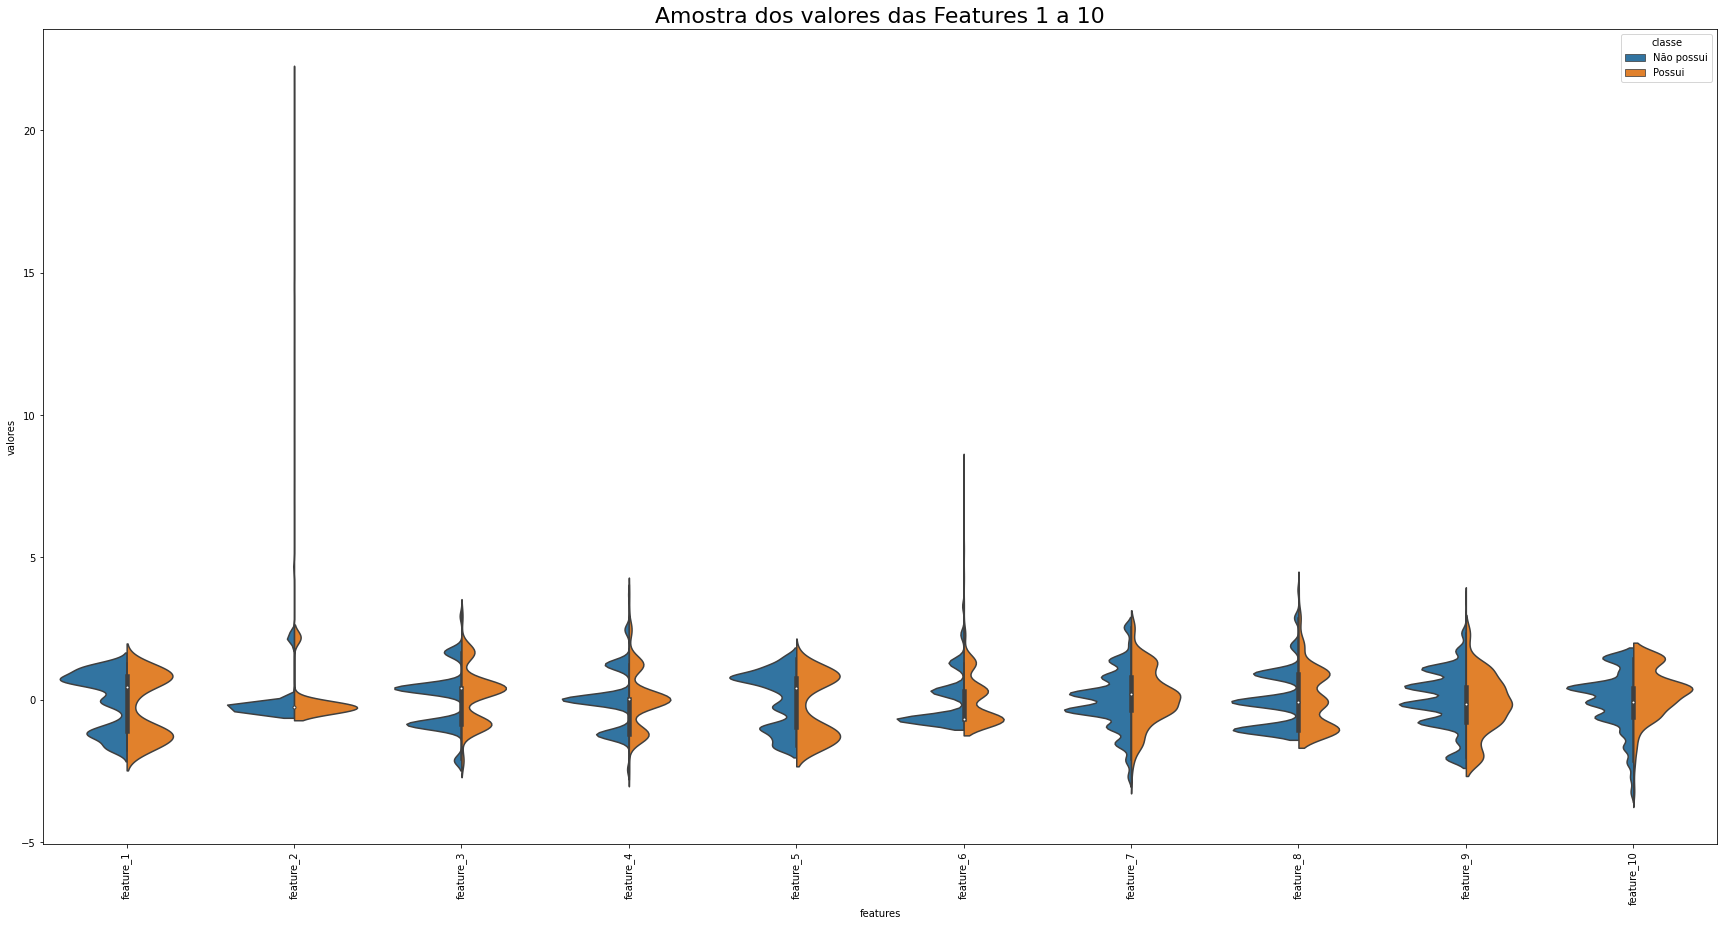

In [51]:
plot_violin(x_v3, 0,10)

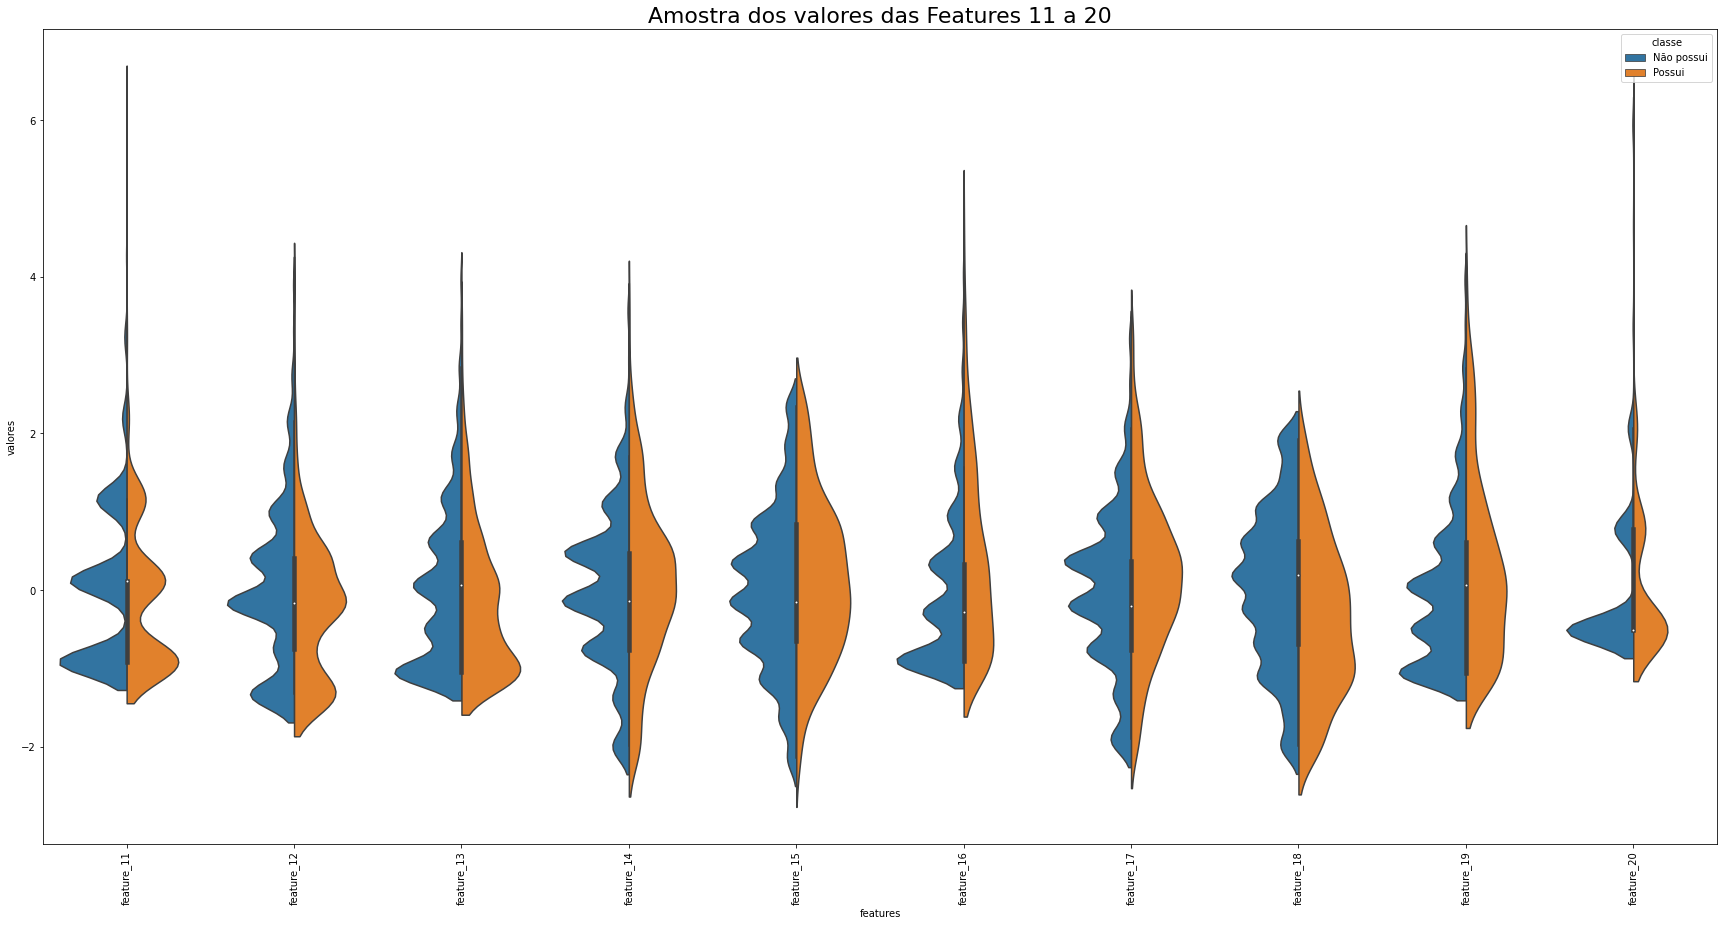

In [52]:
plot_violin(x_v3, 10,20)

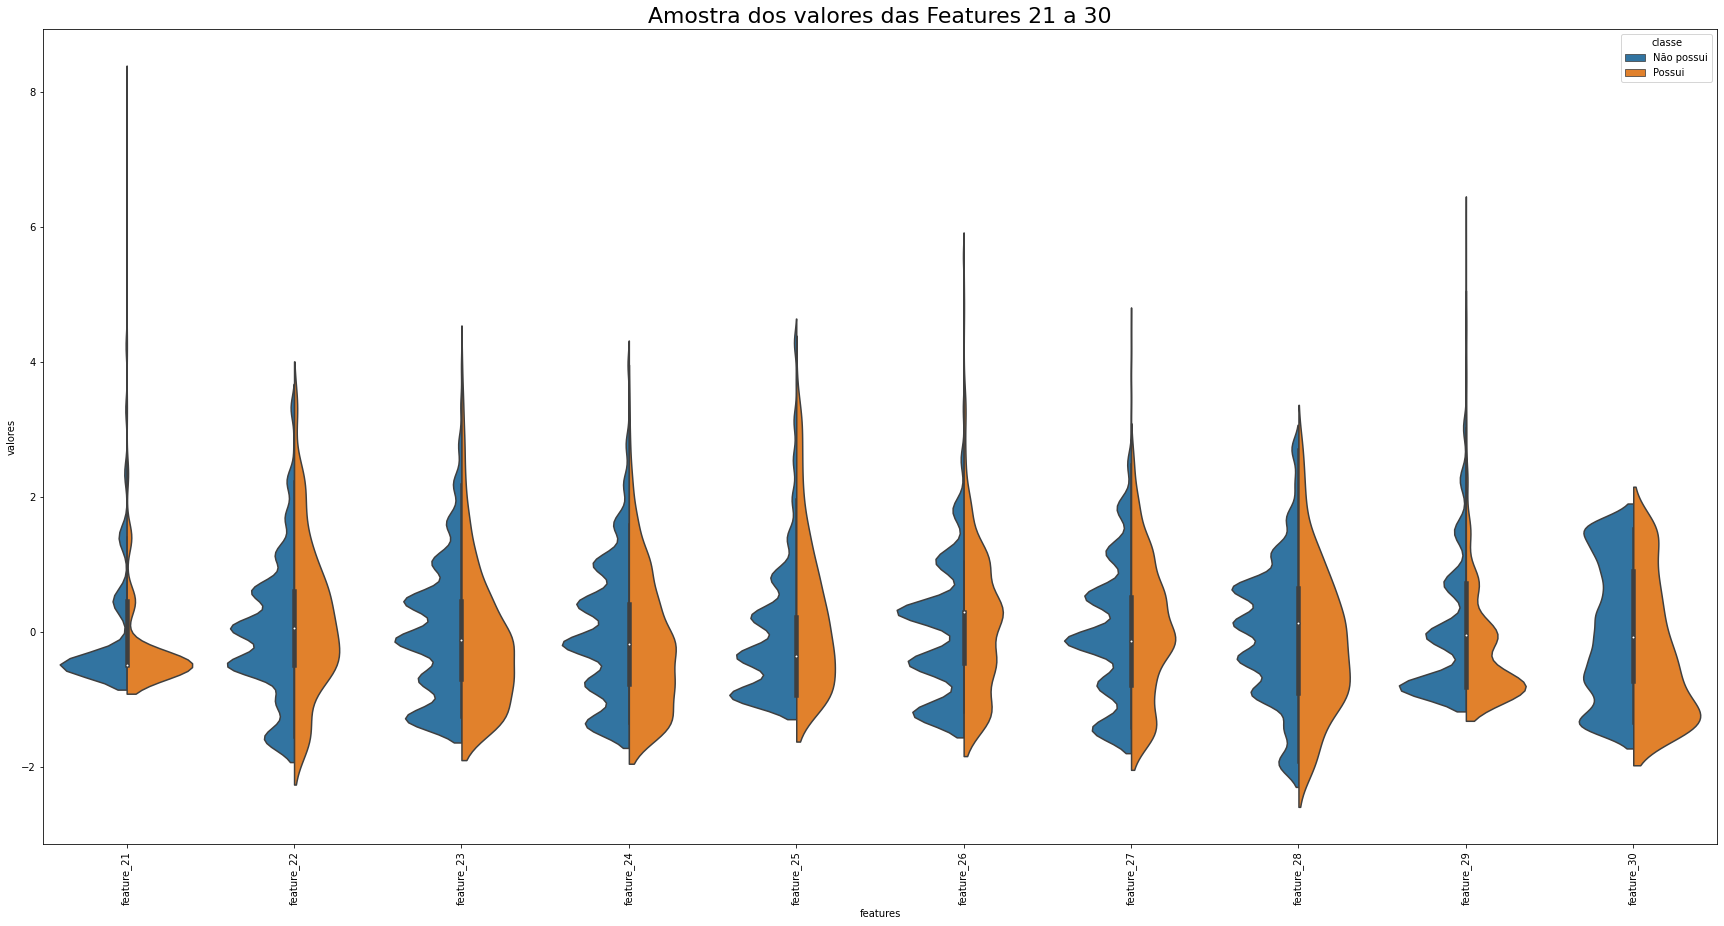

In [53]:
plot_violin(x_v3, 20,30)

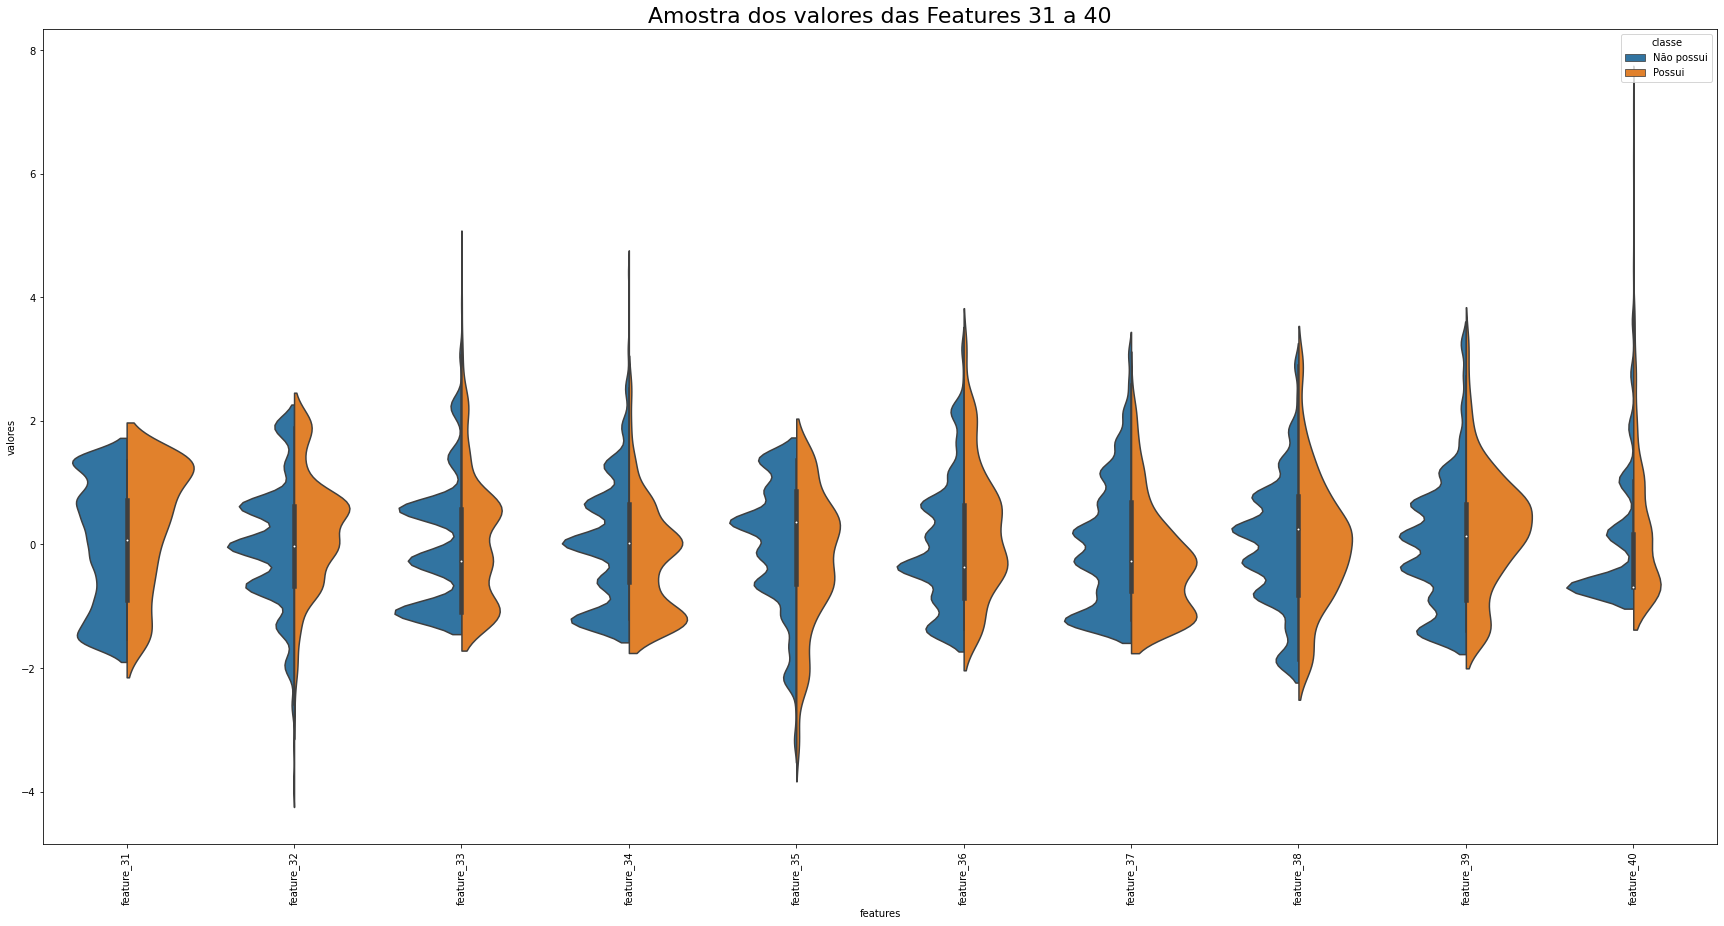

In [54]:
plot_violin(x_v3, 30,40)

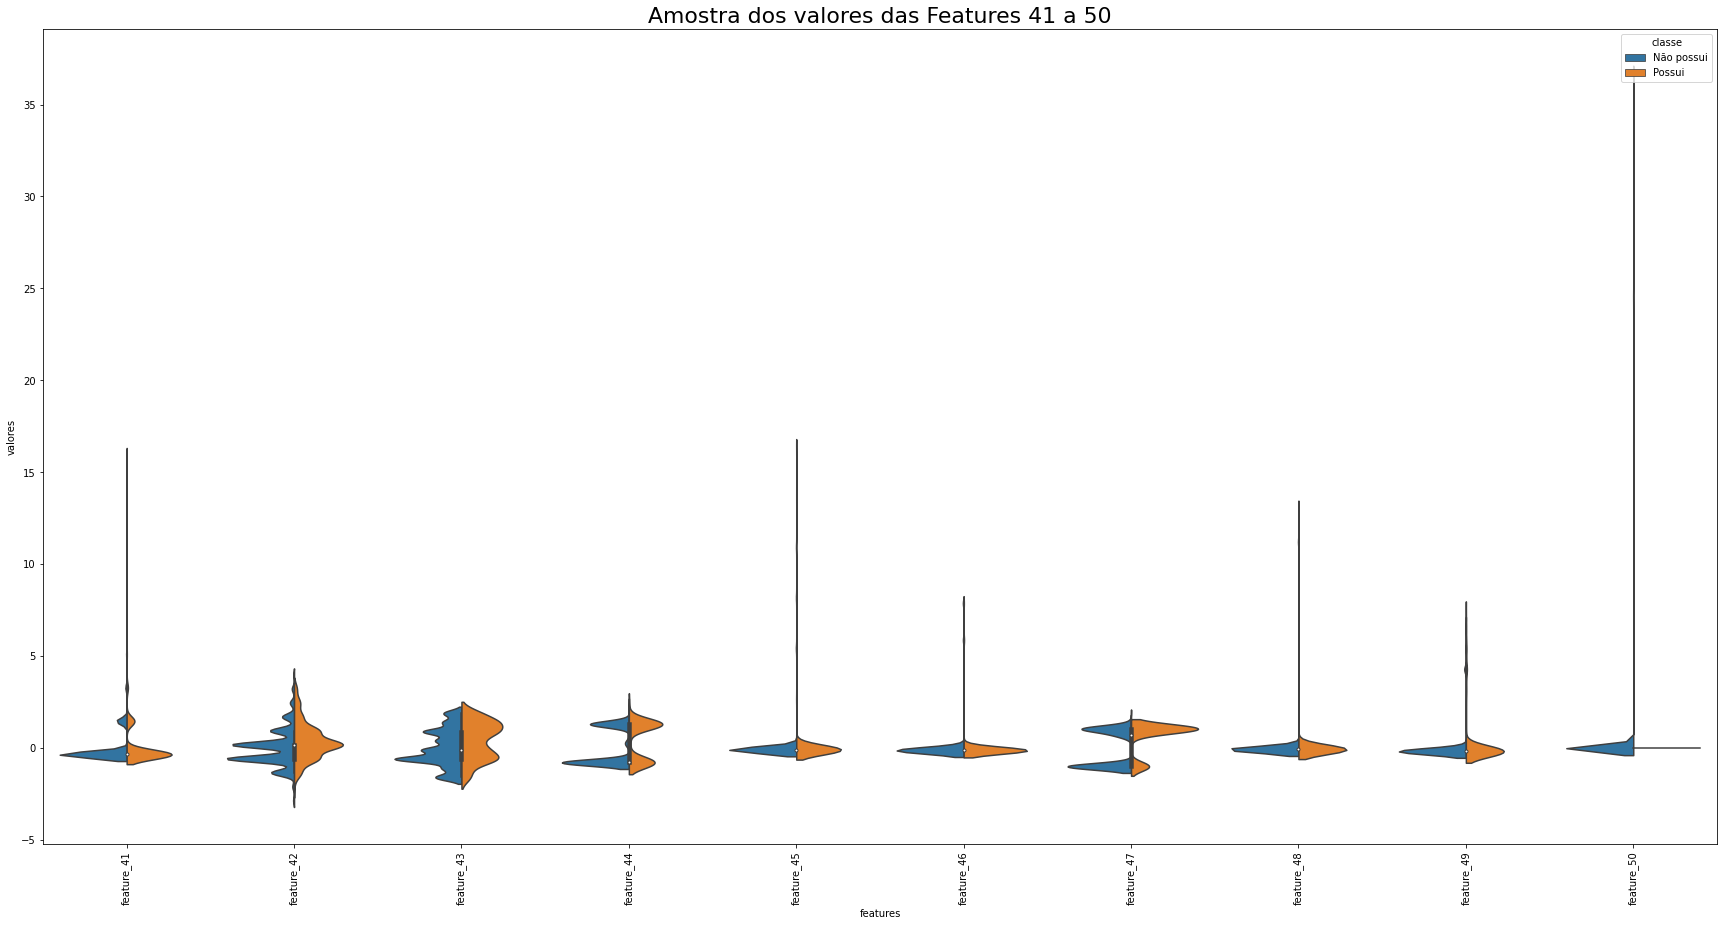

In [55]:
plot_violin(x_v3, 40,50)

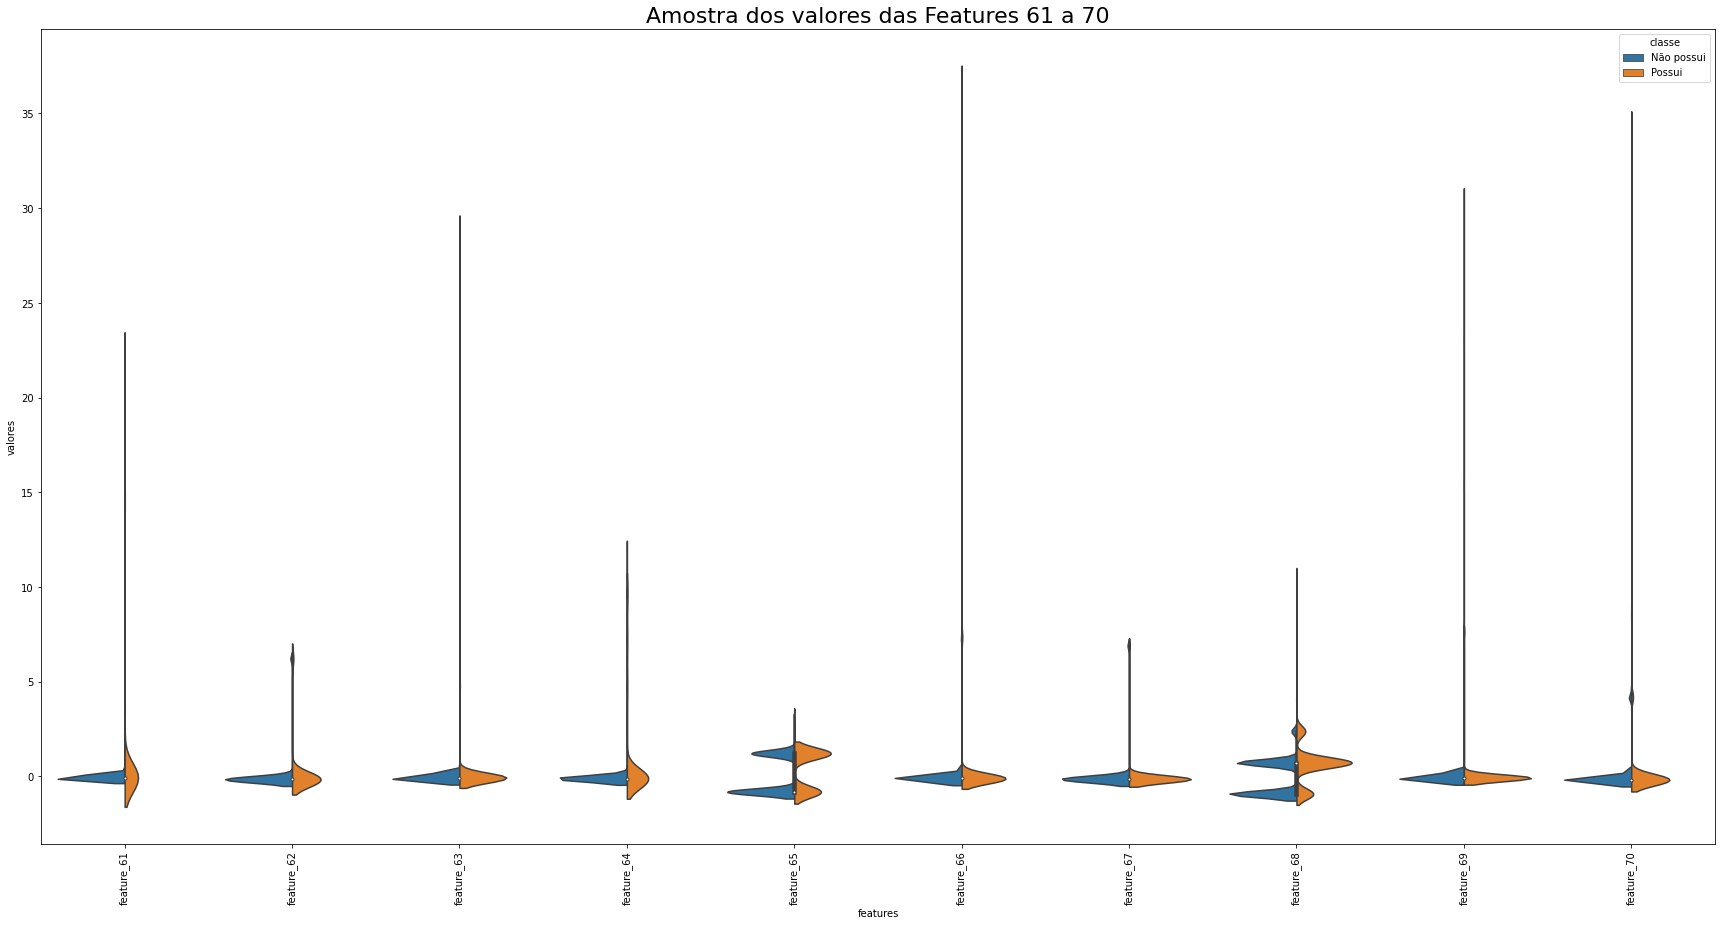

In [56]:
plot_violin(x_v3, 60,70)

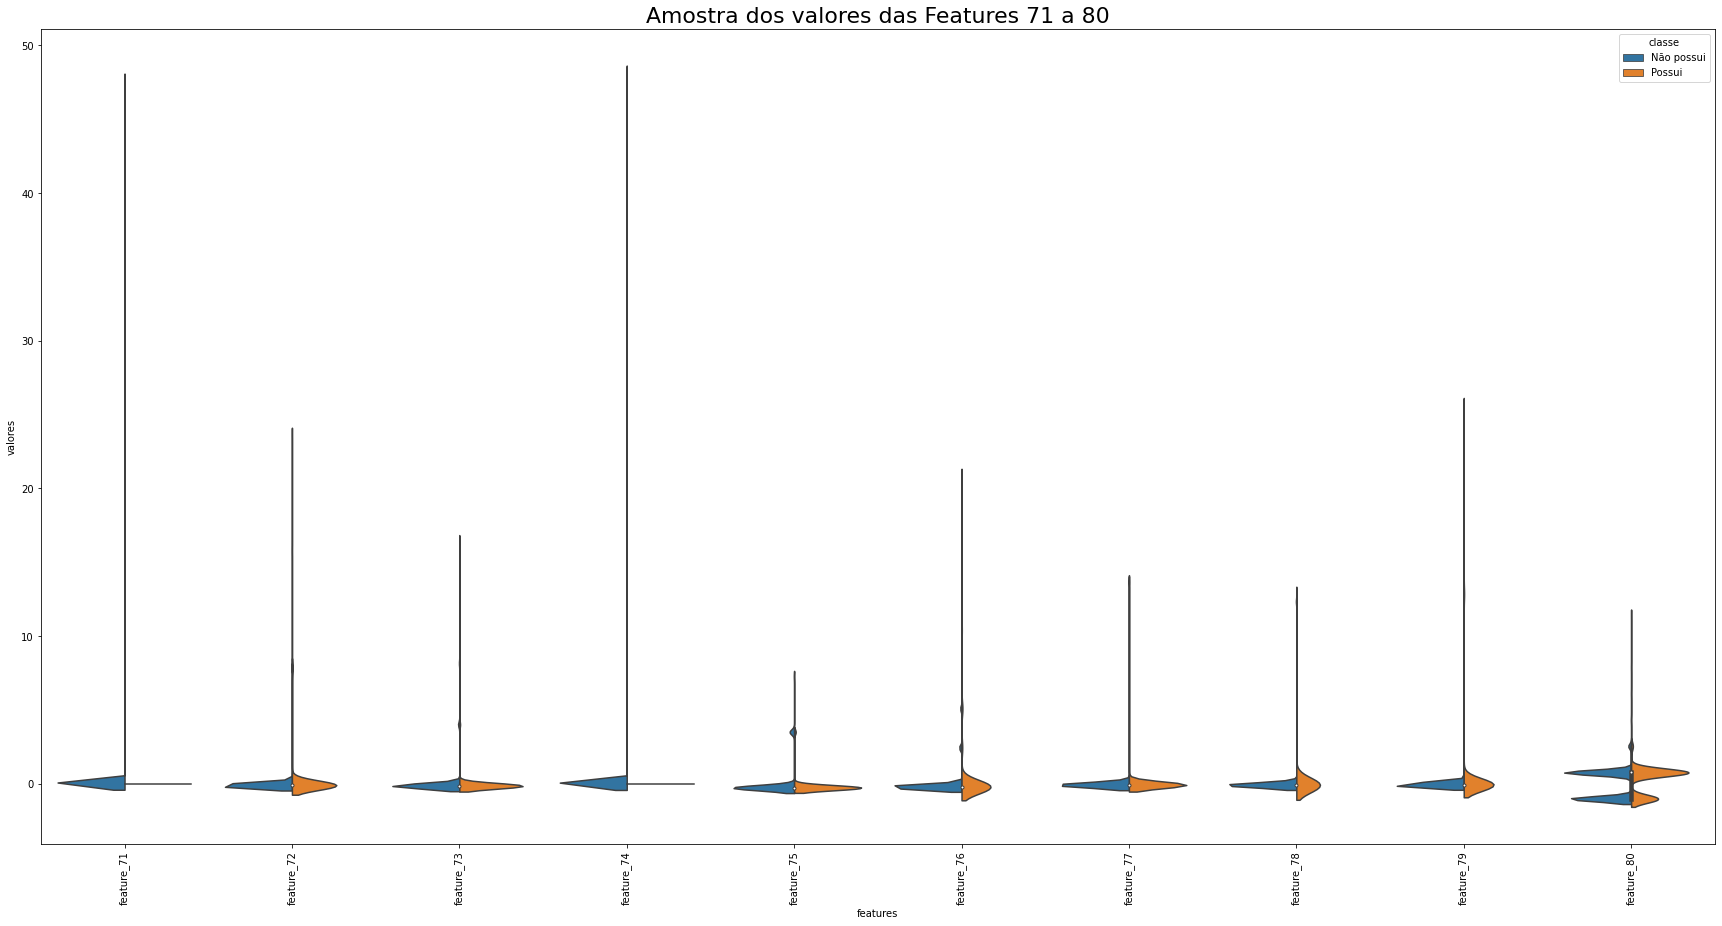

In [57]:
plot_violin(x_v3, 70,80)

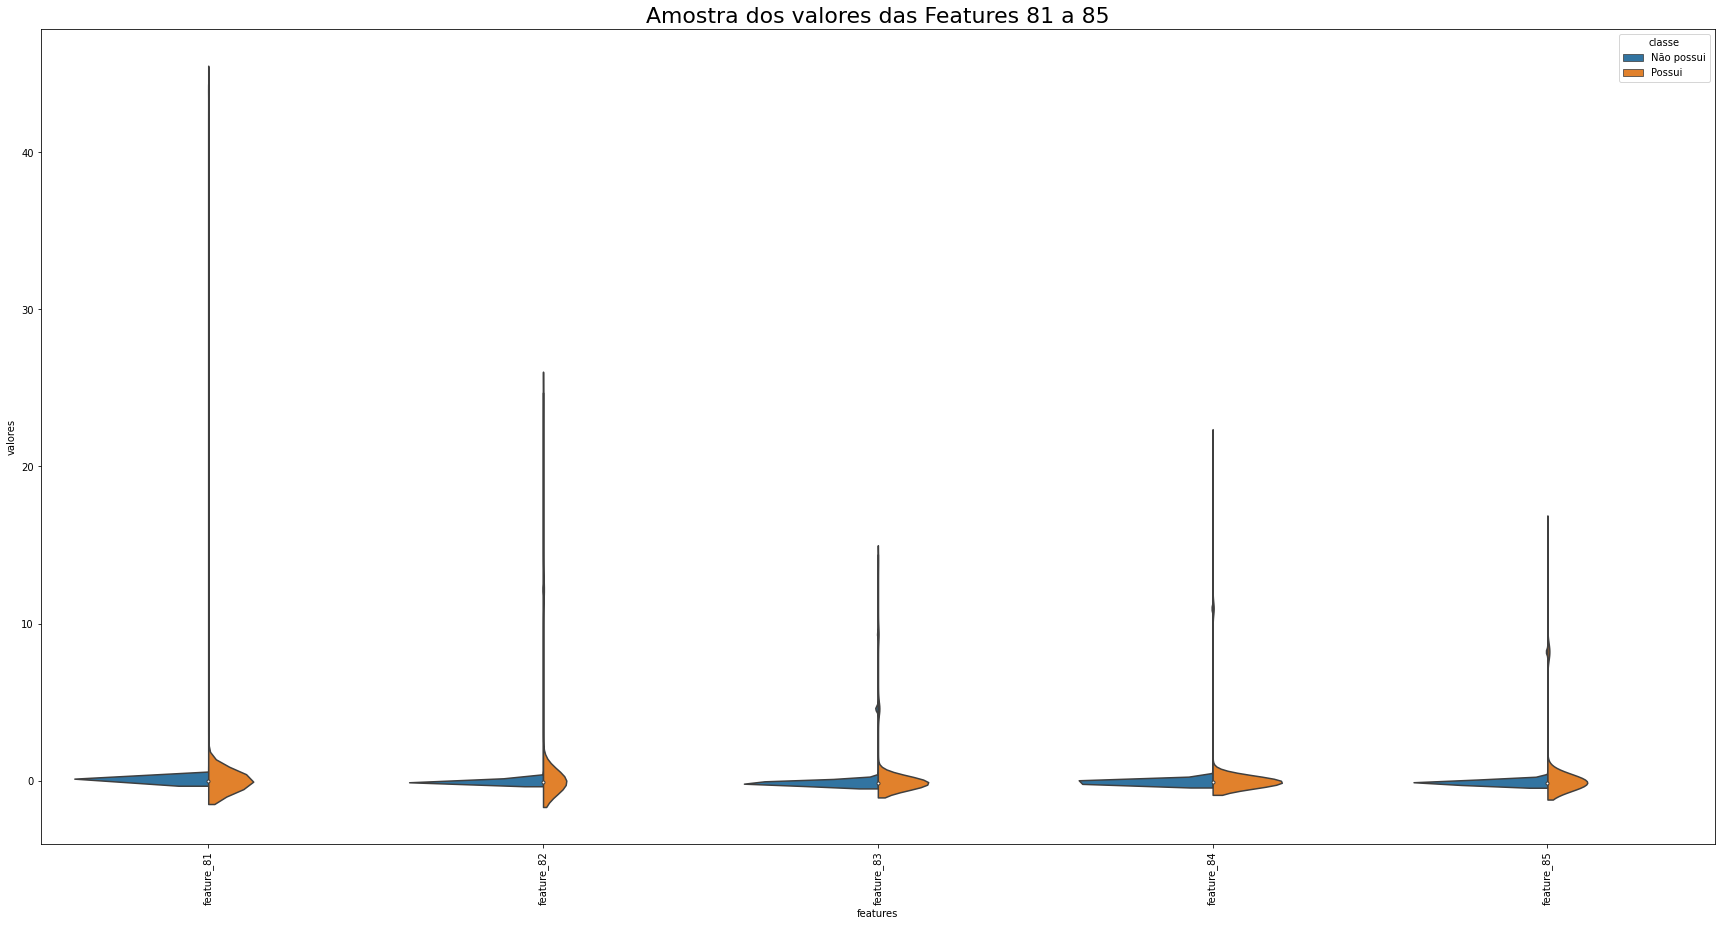

In [58]:
plot_violin(x_v3, 80,85)

## Testando as retiradas das dimensoes

In [59]:
new_dados.shape

(696, 86)

In [60]:
new_dados_v2 = new_dados.copy()

In [61]:
new_dados_v2.shape

(696, 86)

In [62]:
x_nd_v2 = new_dados_v2.drop(columns=['classe'])
y_nd_v2 = new_dados_v2['classe']

In [63]:
import numpy as np
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x_nd_v2, y_nd_v2, test_size = 0.3)

modelo_xgboost = GradientBoostingClassifier(n_estimators=100)

features_rfecv = RFECV(estimator = modelo_xgboost, cv = 5, step =1, scoring='accuracy')
features_rfecv.fit(treino_x, treino_y)
treino_rfecv = features_rfecv.transform(treino_x)
teste_rfecv = features_rfecv.transform(teste_x)

modelo_xgboost.fit(treino_rfecv, treino_y)
previsao = modelo_xgboost.predict(teste_rfecv)
acuracia_rfecv = accuracy_score(teste_y, previsao)
print(acuracia_rfecv)


0.6650717703349283


In [64]:
features_rfecv.n_features_

1

In [65]:
treino_x.columns[features_rfecv.support_]

Index(['feature_47'], dtype='object')

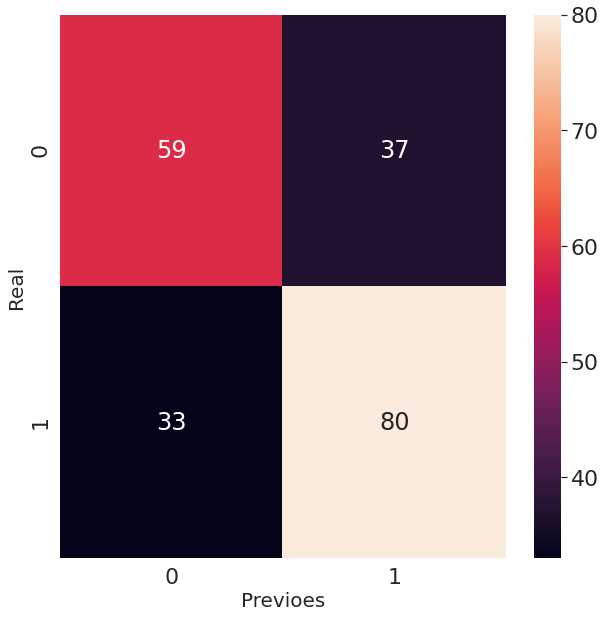

In [66]:
def construir_matriz_confusao(teste_y, previsao):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib

    plt.figure(figsize=(10,10))
    sns.set(font_scale=2)
    matriz_confusao = confusion_matrix(teste_y, previsao)
    fig = sns.heatmap(matriz_confusao, annot=True, fmt='d')
    fig.set_xlabel("Previoes", fontsize = 20)
    fig.set_ylabel("Real", fontsize = 20)

construir_matriz_confusao(teste_y, previsao)

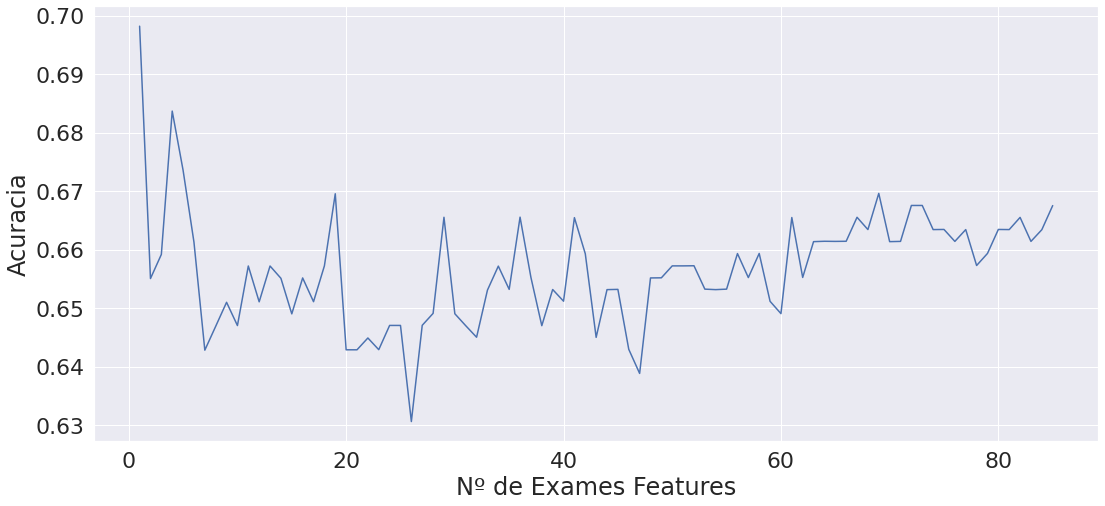

In [67]:
def construir_acuracia_dimensoes(features_rfecv):
    import matplotlib.pyplot as plt

    tamanhoX = len(features_rfecv.grid_scores_) +1

    plt.figure(figsize=(18, 8))
    plt.xlabel("Nº de Exames Features")
    plt.ylabel("Acuracia")
    plt.plot(range(1, tamanhoX), features_rfecv.grid_scores_ )

construir_acuracia_dimensoes(features_rfecv)

#Testando com as dimensões reduzidas

In [68]:
registros_acuracia = []
registros_recall = []
registros_auc = []
registros_f1_micro = []
registros_f1_macro = []
registros_precision = []
index = []

In [69]:
new_dados_v3 = new_dados.copy()

In [70]:
x_v3 = new_dados_v3.drop(columns=['classe'])
y_v3 = new_dados_v3['classe']

## Criação da função de treino e teste reduzido

In [71]:
def treino_teste_reducao(x, y, modelo_estimado, nome_modelo):
    import numpy as np
    from sklearn.feature_selection import RFECV
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import roc_curve
    from sklearn.metrics import auc
    from sklearn.metrics import f1_score
    from sklearn.metrics import precision_score

    SEED = 5
    np.random.seed(SEED)

    treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.3)

    modelo = modelo_estimado
    
    features_rfecv = RFECV(estimator = modelo, cv = 5, step =1, scoring='accuracy')
    features_rfecv.fit(treino_x, treino_y)
    treino_rfecv = features_rfecv.transform(treino_x)
    teste_rfecv = features_rfecv.transform(teste_x)

    modelo.fit(treino_rfecv, treino_y)
    previsoes = modelo.predict(teste_rfecv)

    taxa_de_acuracia = accuracy_score(teste_y, previsoes) * 100
    taxa_de_recall = recall_score(teste_y, previsoes)
    fpr, tpr, thresholds = roc_curve(teste_y, previsoes)
    taxa_de_auc = auc(fpr, tpr)
    taxa_de_f1_micro = f1_score(teste_y, previsoes, average='micro')
    taxa_de_f1_macro = f1_score(teste_y, previsoes, average='macro')
    taxa_precision = precision_score(teste_y, previsoes) 

    registros_acuracia.append(taxa_de_acuracia)
    registros_recall.append(taxa_de_recall)
    registros_auc.append(taxa_de_auc)
    registros_f1_micro.append(taxa_de_f1_micro)
    registros_f1_macro.append(taxa_de_f1_macro)
    registros_precision.append(taxa_precision)
    index.append(nome_modelo)    

    print(f'Acuracia: {taxa_de_acuracia:.2f}%')
    print(f'A recall do modelo {nome_modelo} é de: {taxa_de_recall}')
    print(f'A auc do modelo {nome_modelo} é de: {taxa_de_auc}')
    print(f'A f1 micro do modelo {nome_modelo} é de: {taxa_de_f1_micro}')
    print(f'A f1 macro do modelo {nome_modelo} é de: {taxa_de_f1_macro}')
    print(f'A precision do modelo {nome_modelo} é de: {taxa_de_f1_macro}')
    print(f'O numero de features necessárias para este modelo são: {features_rfecv.n_features_}')
    print(f'As colunas escolhidas para chegar no melhor modelo é/são: {treino_x.columns[features_rfecv.support_]}')
    construir_matriz_confusao(teste_y, previsoes)
    construir_acuracia_dimensoes(features_rfecv)

## GradientBoostingClassifier Reduzido

Acuracia: 66.51%
A recall do modelo XGBoost é de: 0.7079646017699115
A auc do modelo XGBoost é de: 0.6612739675516224
A f1 micro do modelo XGBoost é de: 0.6650717703349283
A f1 macro do modelo XGBoost é de: 0.6616558741905643
A precision do modelo XGBoost é de: 0.6616558741905643
O numero de features necessárias para este modelo são: 1
As colunas escolhidas para chegar no melhor modelo é/são: Index(['feature_47'], dtype='object')


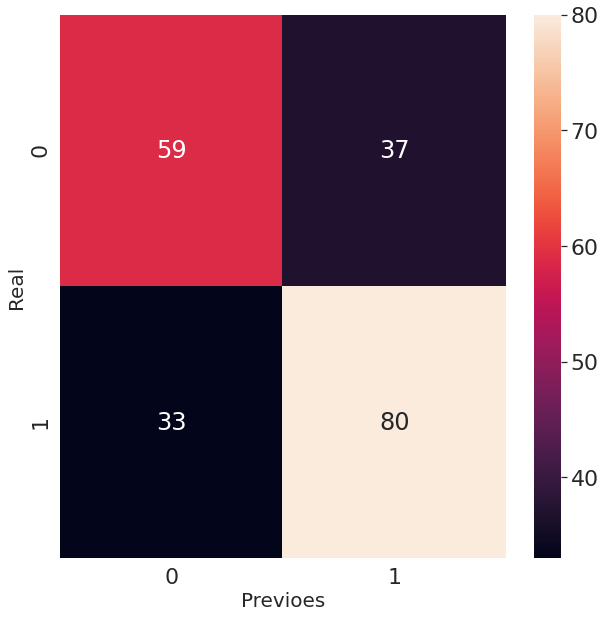

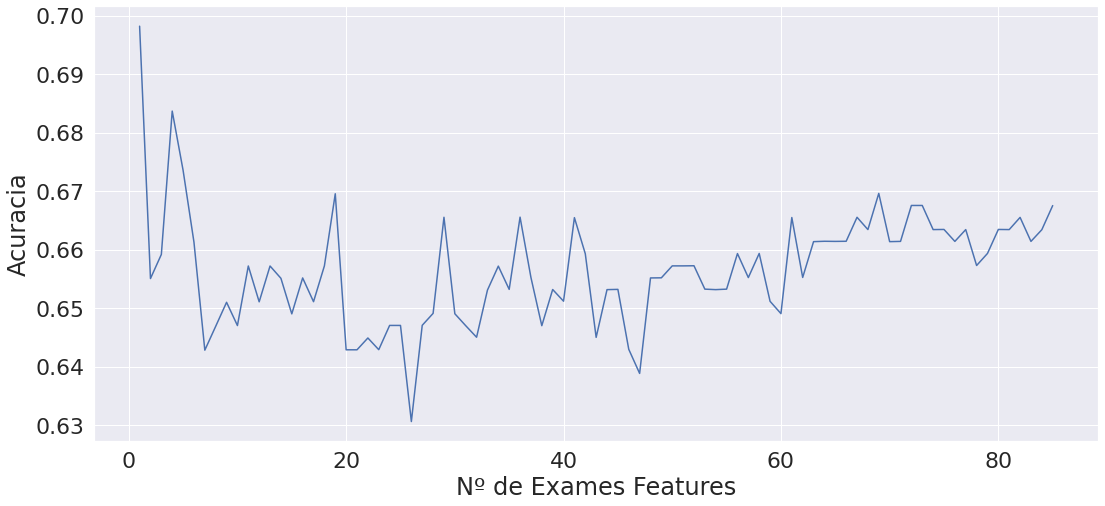

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

modelo_xgboost = GradientBoostingClassifier(n_estimators=100)
treino_teste_reducao(x_v3, y_v3, modelo_xgboost, 'XGBoost')

## Naive Bayes MultinomialNB Reduzido

Acuracia: 57.89%
A recall do modelo Naive_Bayes é de: 0.5486725663716814
A auc do modelo Naive_Bayes é de: 0.5816279498525073
A f1 micro do modelo Naive_Bayes é de: 0.5789473684210527
A f1 macro do modelo Naive_Bayes é de: 0.5788605971789706
A precision do modelo Naive_Bayes é de: 0.5788605971789706
O numero de features necessárias para este modelo são: 79
As colunas escolhidas para chegar no melhor modelo é/são: Index(['feature_2', 'feature_3', 'feature_4', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'feature_11', 'feature_12', 'feature_13',
       'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18',
       'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23',
       'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28',
       'feature_29', 'feature_30', 'feature_33', 'feature_34', 'feature_36',
       'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41',
       'feature_42', 'feature_43', 'feature_44', 'f

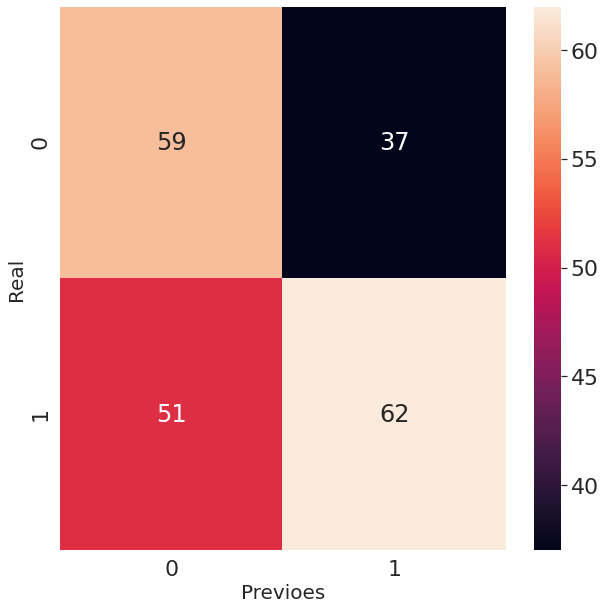

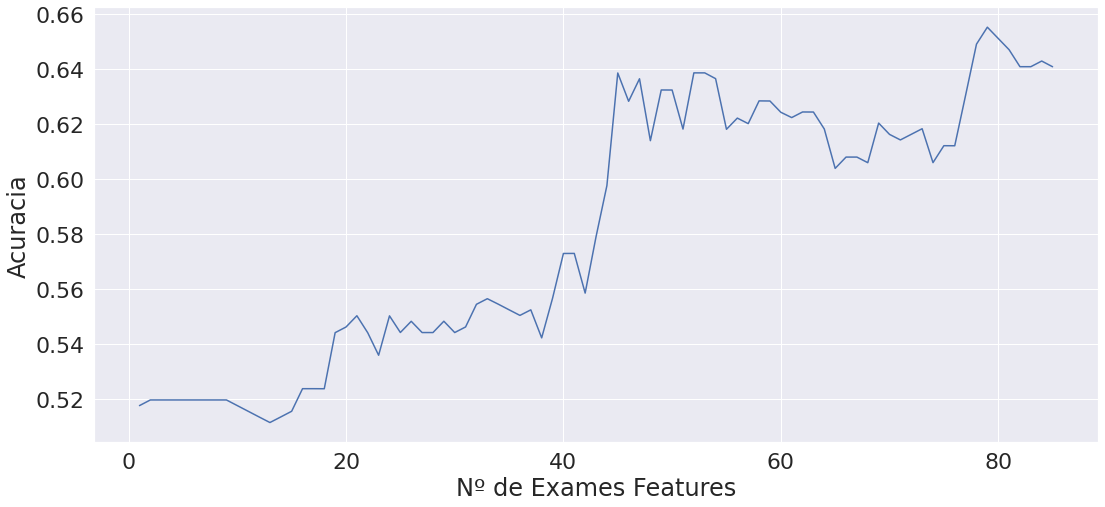

In [73]:
from sklearn.naive_bayes import MultinomialNB

modelo_naivebayes = MultinomialNB()
treino_teste_reducao(x_v3 , y_v3, modelo_naivebayes, 'Naive_Bayes')

## DecisionTreeClassifier Reduzido

Acuracia: 52.63%
A recall do modelo Decision_Tree é de: 0.5398230088495575
A auc do modelo Decision_Tree é de: 0.5251198377581121
A f1 micro do modelo Decision_Tree é de: 0.5263157894736842
A f1 macro do modelo Decision_Tree é de: 0.5247490640145164
A precision do modelo Decision_Tree é de: 0.5247490640145164
O numero de features necessárias para este modelo são: 71
As colunas escolhidas para chegar no melhor modelo é/são: Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15',
       'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20',
       'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25',
       'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30',
       'feature_31', 'feature_32', 'feature_33', 'feature_35', 'feature_36',
       'feature_37', 'feature_38', 'feature

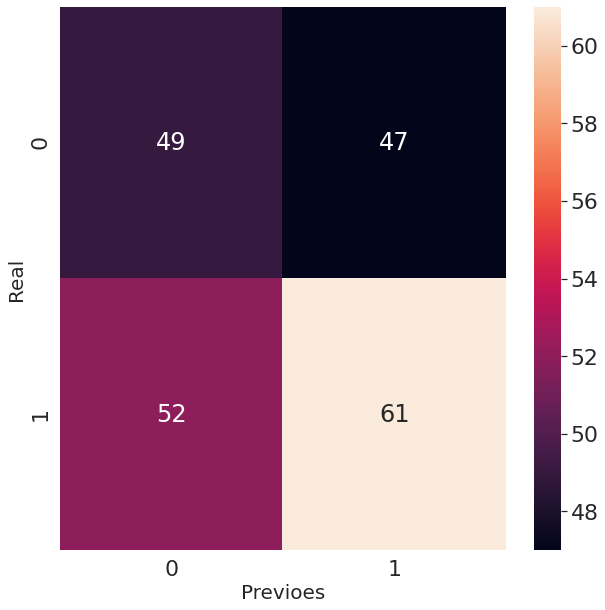

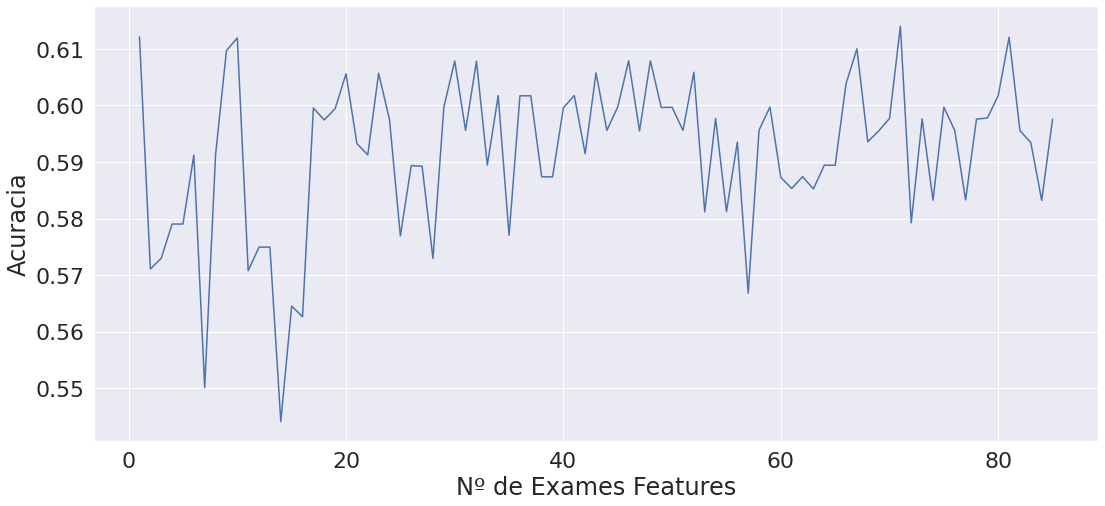

In [74]:
from sklearn.tree import DecisionTreeClassifier

modelo_decisiontree = DecisionTreeClassifier()
treino_teste_reducao(x_v3 , y_v3,modelo_decisiontree, 'Decision_Tree')

## AdaBoostClassifier Reduzido

Acuracia: 60.29%
A recall do modelo Ada_Boost é de: 0.5575221238938053
A auc do modelo Ada_Boost é de: 0.6068860619469026
A f1 micro do modelo Ada_Boost é de: 0.6028708133971292
A f1 macro do modelo Ada_Boost é de: 0.6028708133971291
A precision do modelo Ada_Boost é de: 0.6028708133971291
O numero de features necessárias para este modelo são: 11
As colunas escolhidas para chegar no melhor modelo é/são: Index(['feature_4', 'feature_7', 'feature_15', 'feature_16', 'feature_18',
       'feature_21', 'feature_37', 'feature_38', 'feature_47', 'feature_52',
       'feature_59'],
      dtype='object')


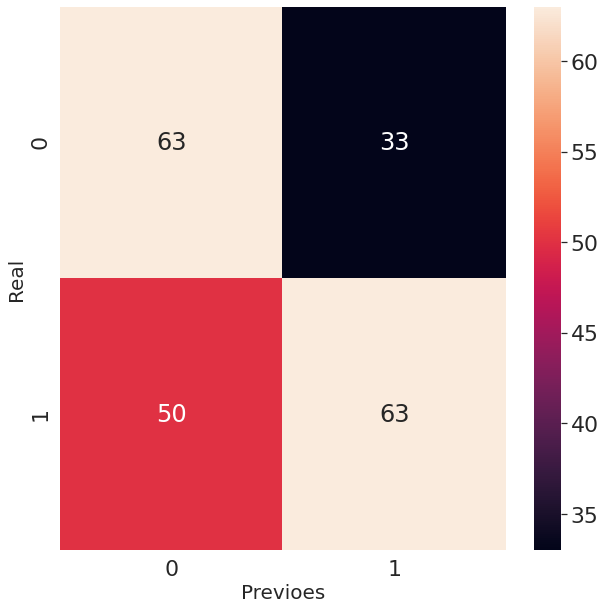

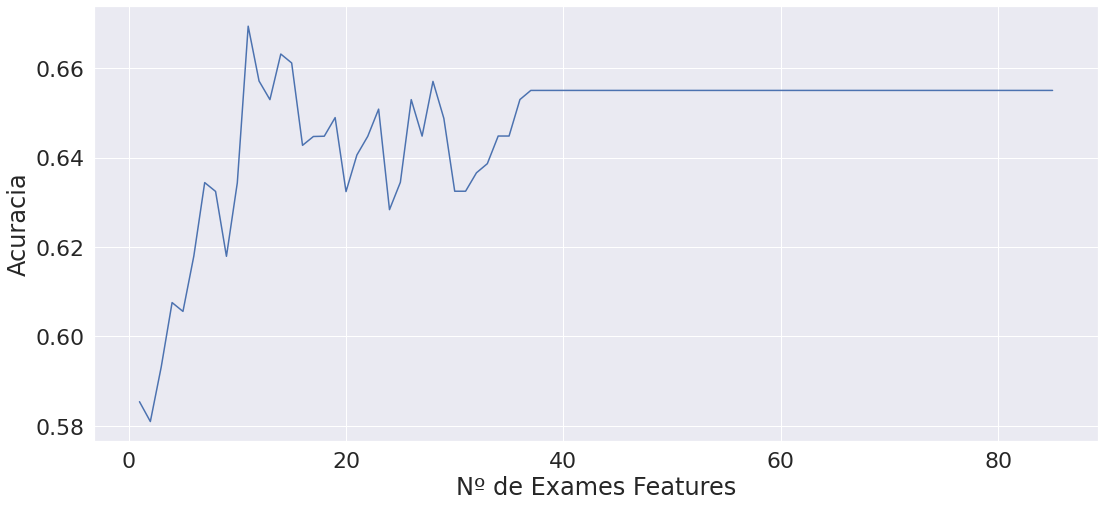

In [75]:
from sklearn.ensemble import AdaBoostClassifier

modelo_adaboost = AdaBoostClassifier()
treino_teste_reducao(x_v3, y_v3,modelo_adaboost, 'Ada_Boost')

##Resultados

In [76]:
resultado_a = pd.DataFrame(registros_acuracia,
                          index=index, 
                          columns=['Acuracia_3'])
resultado_b = pd.DataFrame(registros_recall,
                          index=index, 
                          columns=['recall3'])
resultado_c = pd.DataFrame(registros_auc,
                          index=index, 
                          columns=['auc3'])
resultado_d = pd.DataFrame(registros_f1_micro,
                          index=index, 
                          columns=['f1_micro3'])
resultado_e = pd.DataFrame(registros_f1_macro,
                          index=index, 
                          columns=['f1_macro3'])
resultado_f = pd.DataFrame(registros_precision,
                          index=index, 
                          columns=['precision3'])
resultado3 = pd.concat([resultado_a, resultado_b, resultado_c, resultado_d, resultado_e, resultado_f], axis = 'columns')
resultado3

,Acuracia_3,recall3,auc3,f1_micro3,f1_macro3,precision3
XGBoost,66.507177,0.707965,0.661274,0.665072,0.661656,0.683761
Naive_Bayes,57.894737,0.548673,0.581628,0.578947,0.578861,0.626263
Decision_Tree,52.631579,0.539823,0.525120,0.526316,0.524749,0.564815
Ada_Boost,60.287081,0.557522,0.606886,0.602871,0.602871,0.656250


In [77]:
resultado2

,Acuracia_2,recall2,auc2,f1_micro2,f1_macro2,precision2
Baseline,49.760766,0.000000,0.500000,0.497608,0.332268,0.000000
Linear_SVC,58.851675,0.380952,0.589515,0.588517,0.570329,0.655738
SVC,67.464115,0.714286,0.674451,0.674641,0.674037,0.663717
XGBoost,64.593301,0.657143,0.645879,0.645933,0.645860,0.644860
Random_Forest,59.330144,0.571429,0.593407,0.593301,0.593152,0.600000
Decision_Tree,61.244019,0.666667,0.612179,0.612440,0.611158,0.603448
Naive_Bayes,61.722488,0.523810,0.617674,0.617225,0.614035,0.647059
Ada_Boost,61.244019,0.609524,0.612454,0.612440,0.612440,0.615385


In [78]:
resultado1

,Acuracia_1,recall1,auc1,f1_micro1,f1_macro1,precision
Baseline,94.046938,0.000000,0.500000,0.940469,0.484661,0.000000
Linear_SVC,94.046938,0.000000,0.500000,0.940469,0.484661,0.000000
SVC,93.989697,0.000000,0.499696,0.939897,0.484509,0.000000
XGBoost,93.932456,0.019231,0.508398,0.939325,0.502520,0.333333
Random_Forest,93.131082,0.028846,0.508641,0.931311,0.505995,0.136364
Decision_Tree,93.932456,0.009615,0.503895,0.939325,0.493607,0.250000
Naive_Bayes,77.618775,0.490385,0.642332,0.776188,0.538303,0.131105
Ada_Boost,93.417287,0.028846,0.510163,0.934173,0.507746,0.176471


---


**<h3>Conclusão:** Verificando a acuracia dos meus modelos, foi determinado que o melhor modelo para a classificação do dataset é o XGBoost, ele precisou de apenas uma feature para determinar todo o meu dataset e ficando a menos de um ponto percentual de um modelo que precisou das 85 features do dataset inteiro, sendo relevante também o modelo AdaBoost que ficou 7 pontos percenteuais pior que o modelo SVC.




---




**<h3>Proximo passo:**
    <li> Realizar a validação com o modelor vencendor.

---




# Validação do modelo

## Importando as features de validação

In [79]:
url = 'https://drive.google.com/file/d/1m3fqLY6fgAoYlHJzZwKoiYhlY557tlTv/view?usp=sharing'
url2= 'https://drive.google.com/uc?id=' + url.split('/')[-2]
dados_validacao_x = pd.read_csv(url2, sep='\t', names= colunas)
dados_validacao_x = dados_validacao_x.drop(columns=['classe'])
dados_validacao_x.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,...,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85
0,33,1,4,2,8,0,6,0,3,5,0,4,1,1,8,2,2,6,0,0,1,2,6,1,0,2,1,5,3,1,8,8,1,1,8,1,3,3,3,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,6,1,3,2,2,0,5,0,4,5,2,2,1,4,5,5,4,0,5,0,0,4,0,0,4,3,0,2,1,3,6,9,0,0,7,2,1,1,5,4,...,0,6,0,4,0,0,0,0,0,3,0,0,0,4,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0
2,39,1,3,3,9,1,4,2,3,5,2,3,2,3,6,2,4,4,2,1,1,3,2,2,1,1,5,2,1,1,8,6,2,2,6,3,2,4,3,1,...,0,6,0,0,0,0,0,0,0,4,0,0,0,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,4,1,2,4,4,2,4,4,2,1,1,5,1,2,3,1,3,2,2,3,6,7,2,1,7,2,2,5,3,1,...,0,5,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,31,1,2,4,7,0,2,0,7,9,0,0,0,6,3,0,0,9,0,0,0,2,4,4,0,0,0,7,2,9,0,7,2,0,9,0,5,4,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### Analise feature

In [80]:
dados_validacao_x.shape

(4000, 85)

In [81]:
valores_nulos = dados_validacao_x.isnull().sum()
verificando_nulos = pd.DataFrame(valores_nulos, columns=['resultado'])
verificando_nulos.query('resultado > 0')

,resultado


## Importando a classe de validação

In [82]:
url = 'https://drive.google.com/file/d/1EJAYcVJiKgIbzCWUrnvxISONkq04JNm7/view?usp=sharing'
url2= 'https://drive.google.com/uc?id=' + url.split('/')[-2]
dados_validacao_y = pd.read_csv(url2, sep='\t', names= ['classe'])
dados_validacao_y.head()

,classe
0,0
1,1
2,0
3,0
4,0


### Analise classe

In [83]:
dados_validacao_y.shape

(4000, 1)

In [84]:
valores_nulos = dados_validacao_y.isnull().sum()
verificando_nulos = pd.DataFrame(valores_nulos, columns=['resultado'])
verificando_nulos.query('resultado > 0')

,resultado


## Validando o modelo

In [85]:
x_dimensionado = dados_validacao_x[['feature_47']]

In [86]:
x_dimensionado.head()

,feature_47
0,0
1,6
2,6
3,5
4,0


Acuracia do modelo de validação é de: 62.18%
A recall do modelo validação é de: 0.6638655462184874
A auc do modelo validação é de: 0.6414755694941453
A f1 micro do modelo validação é de: 0.62175
A f1 macro do modelo validação é de: 0.4637964716000404
A precision do modelo validação é de: 0.4637964716000404


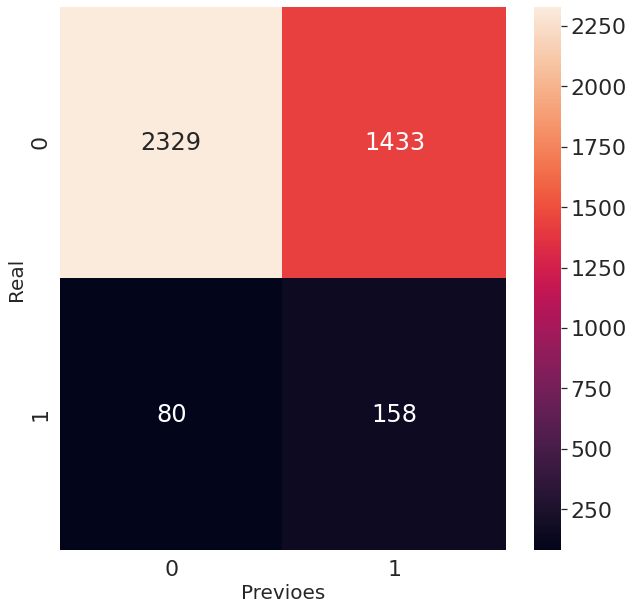

In [87]:
import numpy as np
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

SEED = 5
np.random.seed(SEED)

# treino_x, teste_x, treino_y, teste_y = train_test_split(x_dimensionado, dados_validacao_y, test_size = 0.3)

modelo = GradientBoostingClassifier(n_estimators=100)

modelo.fit(x_v3[['feature_47']], y_v3)
previsao = modelo.predict(x_dimensionado)

taxa_de_acuracia = accuracy_score(dados_validacao_y, previsao) * 100
taxa_de_recall = recall_score(dados_validacao_y, previsao)
fpr, tpr, thresholds = roc_curve(dados_validacao_y, previsao)
taxa_de_auc = auc(fpr, tpr)
taxa_de_f1_micro = f1_score(dados_validacao_y, previsao, average='micro')
taxa_de_f1_macro = f1_score(dados_validacao_y, previsao, average='macro')
taxa_precision = precision_score(dados_validacao_y, previsao)

print(f'Acuracia do modelo de validação é de: {taxa_de_acuracia:.2f}%')
print(f'A recall do modelo validação é de: {taxa_de_recall}')
print(f'A auc do modelo validação é de: {taxa_de_auc}')
print(f'A f1 micro do modelo validação é de: {taxa_de_f1_micro}')
print(f'A f1 macro do modelo validação é de: {taxa_de_f1_macro}')
print(f'A precision do modelo validação é de: {taxa_de_f1_macro}')
construir_matriz_confusao(dados_validacao_y, previsao)

## TSNE

In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dados_validacao_x_v2 = scaler.fit_transform(dados_validacao_x)

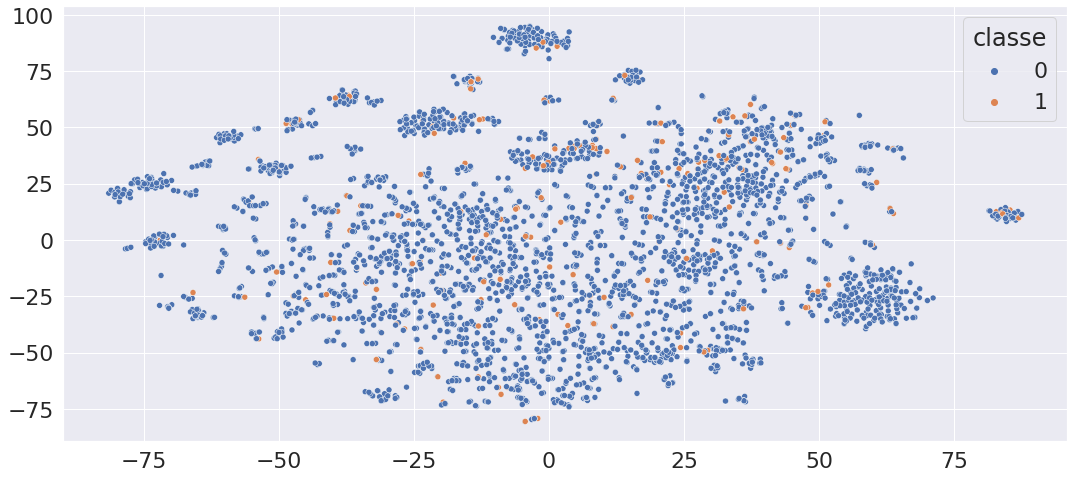

In [89]:
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(n_components=2)

tipos_features_tsne_v3 = tsne.fit_transform(dados_validacao_x_v2)
plt.figure(figsize=(18,8))
sns.scatterplot(x = tipos_features_tsne_v3[:,0]
                , y = tipos_features_tsne_v3[:,1]
                , hue = dados_validacao_y['classe'])

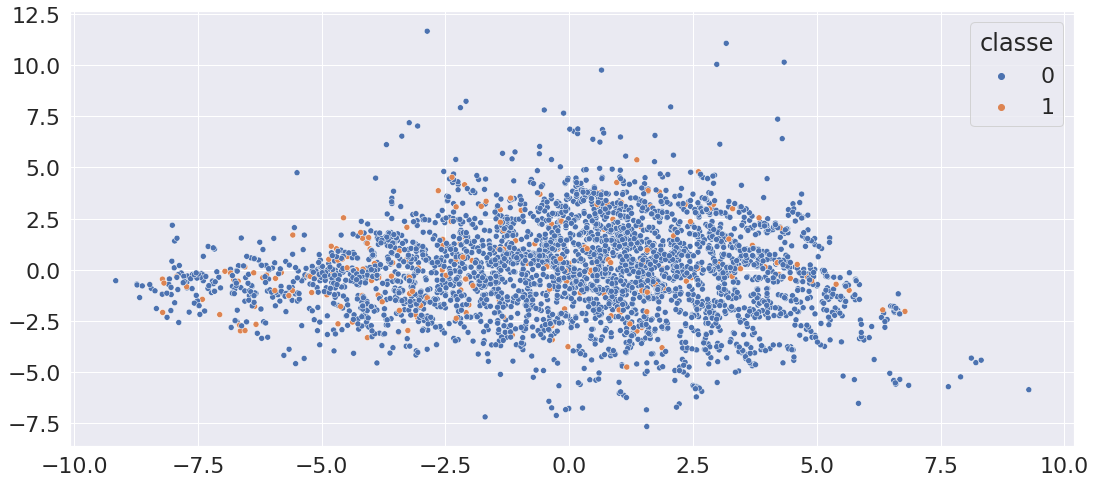

In [90]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)


tipos_features_pca_v3 = pca.fit_transform(dados_validacao_x_v2)
plt.figure(figsize=(18,8))
sns.scatterplot(x = tipos_features_pca_v3[:,0]
                , y = tipos_features_pca_v3[:,1]
                , hue = dados_validacao_y['classe'])

## Conclusão:
<h4> Neste projeto começamos analisando o dataset inicial oferecido e investigando em seguida dos resultados aprensentados sua classe. Com a finalização do balanceamento do dataset foram realizados novos testes e adquirido os quatro melhores modelos de classificação. 

<h4>Após a seleção dos quatro melhores foram feitas analises nas dimensoes do dataset e nesta analise temos um diagnostico que afetou o resultado final da avaliação, pois temos dimensões não bem distribuidas para as classificações que não possuem apolice, podendo ter afetado muito no final do resultado, visto que, o modelo final escolhido erra muito mais quando temos alguém que não possue apólice. 

<h4>Feita a analise das dimensoes, foi reduzida o tamanho das dimensões, visto que, o excesso de dimensões pode trazer um super ajuste para nosso modelo e deixando ele lento e novamente foram feitos testes para a analise do modelo vencendor, o que se saiu melhor foi o GradientBoostModel utilizado na validação, ele precisou de apenas uma dimensão para chegar a um resultado de 66% de acuracia.

<h4> Por fim, foi feita a validação do modelo, treinado com os dados de teste e validado com os dados fornecidos nos dois dataset um contento somente as features e outro contendo somente a classe, chegando conclusão que nosso modelo testado no mundo real chegou muito proximo ao modelo de teste com 62% de acuracia e 64% de AUC, sendo considerado um modelo satisfatorio.



---



# testes

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acuracia do modelo de validação é de: 94.83%


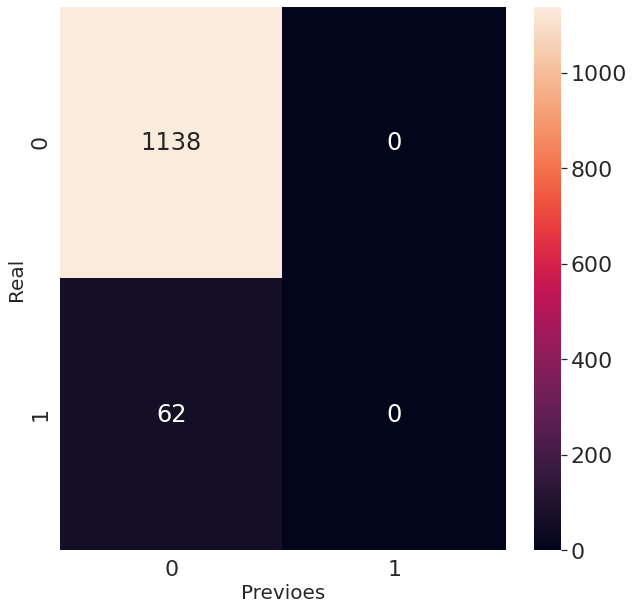

In [91]:
import numpy as np
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier


SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x_dimensionado, dados_validacao_y, test_size = 0.3)

modelo = GradientBoostingClassifier(n_estimators=100)

modelo.fit(treino_x, treino_y)
previsao = modelo.predict(teste_x)
taxa_de_acuracia = accuracy_score(teste_y, previsao) * 100

print(f'Acuracia do modelo de validação é de: {taxa_de_acuracia:.2f}%')
construir_matriz_confusao(teste_y, previsao)